In [2]:
conda install pymongo

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
yelp_db = client['yelp']
reviews_table = yelp_db['reviews']

In [5]:
import json
with open('yelp_dataset/review.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews_table.insert(review)

/Users/yuewengmak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """


In [8]:
cur = reviews_table.find().limit(10)
for r in cur:
    print(r)

{'_id': ObjectId('5e064d55639ab4c519e59b5c'), 'review_id': 'Q1sbwvVQXV2734tPgoKj4Q', 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA', 'business_id': 'ujmEBvifdJM6h6RLv4wQIg', 'stars': 1.0, 'useful': 6, 'funny': 1, 'cool': 0, 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.', 'date': '2013-05-07 04:34:36'}
{'_id': ObjectId('5e064d55639ab4c519e59b5d'), 'review_id': 'GJXCdrto3ASJOqKeVWPi6Q', 'user_id': 'yXQM5uF2jS6es16SJzNHfg', 'business_id': 'NZnhc2sEQy3RmzKTZnqtwQ', 'stars': 5.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled blac

In [10]:
business_table = yelp_db['business']
# with open('yelp_dataset/business.json', 'r') as f:
#     for line in f:
#         business = json.loads(line)
#         business_table.insert(business)

In [11]:
checkin_table = yelp_db['checkin']
# with open('yelp_dataset/checkin.json', 'r') as f:
#     for line in f:
#         checkin = json.loads(line)
#         checkin_table.insert(checkin)

In [12]:
tip_table = yelp_db['tip']
# with open('yelp_dataset/tip.json', 'r') as f:
#     for line in f:
#         tip = json.loads(line)
#         tip_table.insert(tip)

In [13]:
user_table = yelp_db['user']
# with open('yelp_dataset/user.json', 'r') as f:
#     for line in f:
#         user = json.loads(line)
#         user_table.insert(user)

In [14]:
import pandas as pd

review_df = pd.DataFrame(list(reviews_table.find()))
business_df = pd.DataFrame(list(business_table.find()))
checkin_df = pd.DataFrame(list(checkin_table.find()))
tip_df = pd.DataFrame(list(tip_table.find()))
user_df = pd.DataFrame(list(user_table.find()))

In [15]:
ca = business_df[business_df['state'] == 'CA']
ca

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
19062,5e0667ef639ab4c5194bea9e,YMeWjOd1svHDGdDCKoiGgg,Electric Daisy Carnival,7000 N Las Vegas Blvd,Los Angeles,CA,90037,36.273260,-115.009430,4.5,36,0,"{'OutdoorSeating': 'True', 'GoodForKids': 'Fal...","Local Flavor, Festivals, Arts & Entertainment,...",None
20237,5e0667f0639ab4c5194bef35,x_vRaIuDsvvRK5tQpV9hoA,Pretty Girl Lingo,,Las Vegas,CA,89109,36.128561,-115.171130,5.0,4,1,"{'ByAppointmentOnly': 'True', 'HairSpecializes...","Hair Extensions, Makeup Artists, Hair Salons, ...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
36681,5e066801639ab4c5194c2f71,dPlwOjYe6gFT-w85Qg6GeA,Atlantic Place Dental Office,111 N Atlantic Blvd,Monterey Park,CA,91754,36.125053,-115.163918,3.0,4,1,"{'ByAppointmentOnly': 'True', 'Ambience': '{'r...","Restaurants, General Dentistry, Dentists, Shop...",None
47208,5e06680c639ab4c5194c5890,t8xvlKk5axVYy2c2p70NRg,Makeup By Kassandra Franco,,Las Vegas Nv,CA,92703,36.169941,-115.139830,4.5,15,1,"{'BikeParking': 'True', 'ByAppointmentOnly': '...","Hair Extensions, Hair Stylists, Makeup Artists...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
54428,5e066814639ab4c5194c74c4,Lbq36N-MFtn9ozAYs1ZiCA,Couture Pawz,,Chandler,CA,85226,33.287221,-111.940325,4.5,8,0,None,"Pet Services, Pet Groomers, Pets",None
56948,5e066816639ab4c5194c7e9c,oBEFhUe7yEH1PK25bImCWA,Brooks Photography,"4372 West Point Loma Blvd, Ste A",San Diego,CA,92107,36.175000,-115.136389,1.5,35,1,{'BusinessAcceptsCreditCards': 'True'},"Session Photography, Event Photography, Event ...",None
57583,5e066817639ab4c5194c8117,SP_tfo1VdYlrXBG_6OMZdA,Tiffany's Braid Lounge,Rose Valley,Antioch,CA,94531,36.221598,-115.168253,2.5,11,1,"{'BusinessParking': '{'garage': False, 'street...","Hair Stylists, Beauty & Spas, Hair Extensions,...","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
68639,5e066823639ab4c5194cac47,UfUddig0a3jDlIrz3Jg-JQ,Fireplace Door Guy,32200 Vista Del Monte,Temecula,CA,92591,33.495635,-111.925129,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Fireplace Services, Chimney Sweeps, Door Sales...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
68990,5e066823639ab4c5194cada6,meK9y7zRVoN4uaf6sAC8KQ,Finest-Edge Precision Sharpening Service,,Peninsula,CA,44264,41.241167,-81.552618,5.0,22,1,{'BusinessAcceptsCreditCards': 'True'},"Local Services, Knife Sharpening",None
78449,5e06682d639ab4c5194cd299,UE_fvET7Aj16w7Cluj7ZGg,Beachside Tans,21170 Beach Blvd,Huntington Beach,CA,85206,33.401362,-111.728268,5.0,10,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Spray Tanning, Tanning","{'Tuesday': '10:0-17:0', 'Wednesday': '10:0-17..."


In [16]:
import numpy as np

business_df = business_df.dropna(subset=['categories'])
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_df

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,5e0667da639ab4c5194ba02a,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,5e0667da639ab4c5194ba033,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,5e0667da639ab4c5194ba035,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,5e0667da639ab4c5194ba039,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192587,5e0668a3639ab4c5194e9073,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
192589,5e0668a3639ab4c5194e9075,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
192595,5e0668a3639ab4c5194e907b,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
192596,5e0668a3639ab4c5194e907c,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [61]:
ca = restaurant_df[restaurant_df['state'] == 'CA']
ca

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
36681,5e066801639ab4c5194c2f71,dPlwOjYe6gFT-w85Qg6GeA,Atlantic Place Dental Office,111 N Atlantic Blvd,Monterey Park,CA,91754,36.125053,-115.163918,3.0,4,1,"{'ByAppointmentOnly': 'True', 'Ambience': '{'r...","Restaurants, General Dentistry, Dentists, Shop...",None


In [17]:
business_review = pd.merge(restaurant_df, review_df, left_on='business_id', right_on='business_id')
business_review

,_id_x,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,hours,_id_y,review_id,user_id,stars_y,useful,funny,cool,text,date
0,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d5d639ab4c519e5bcfd,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d65639ab4c519e5dec1,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6a639ab4c519e5f6fc,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6b639ab4c519e5fbdc,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1,0,0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d71639ab4c519e61308,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2,1,2,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201679,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e06648d639ab4c5194a2883,DGwxHd3N8kJNs9GRnxp09A,ZO8h27XOn_XFKLLRRrLp0g,5.0,2,1,0,When I write a review on someplace that I have...,2013-05-03 18:57:28
4201680,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e066490639ab4c5194a385b,xpfvecUdqyTug6ahkWQ9SQ,mwual7bROpwhZ3fu_GiPtQ,5.0,1,0,0,We stopped in at Tre Belle on a Tuesday evenin...,2013-12-04 01:16:42
4201681,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e0664d3639ab4c5194b5b72,5vt9FZre5dqksWzpj-8gCg,WKneD6tKr18q0ey0QbHBaA,3.0,1,0,0,I wasnt impressed. The place is beautiful and ...,2012-04-25 16:51:38
4201682,5e0668a3639ab4c5194e9083,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ...",5e0664e0639ab4c5194b95a5,gLKSsgs4t2XPvfg6wOPuEQ,PxB2oZXO9N_4Zo2VIPUuGA,1.0,1,0,0,Last night some friends and I dined at this es...,2018-02-22 22:32:44


In [18]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(50)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ']

In [19]:
# colors = ['blue', 'green', 'red', 'brown', 'cyan', 'purple']
import matplotlib.pyplot as plt

az = most_reviews[most_reviews['state'] == 'AZ']

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 50 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'], color= 'blue', label='NV')
ax.bar(az['name'], az['review_count'], color='red', label='AZ')
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_50_restaurants.png', bbox_inches = "tight")

In [20]:
most_reviews = restaurant_df.sort_values(by=['review_count'], ascending=False).head(100)
most_reviews.state.unique()

state = []

for s in most_reviews.state.unique():
    state.append(s)
    
state

['NV', 'AZ', 'QC', 'ON', 'PA', 'WI']

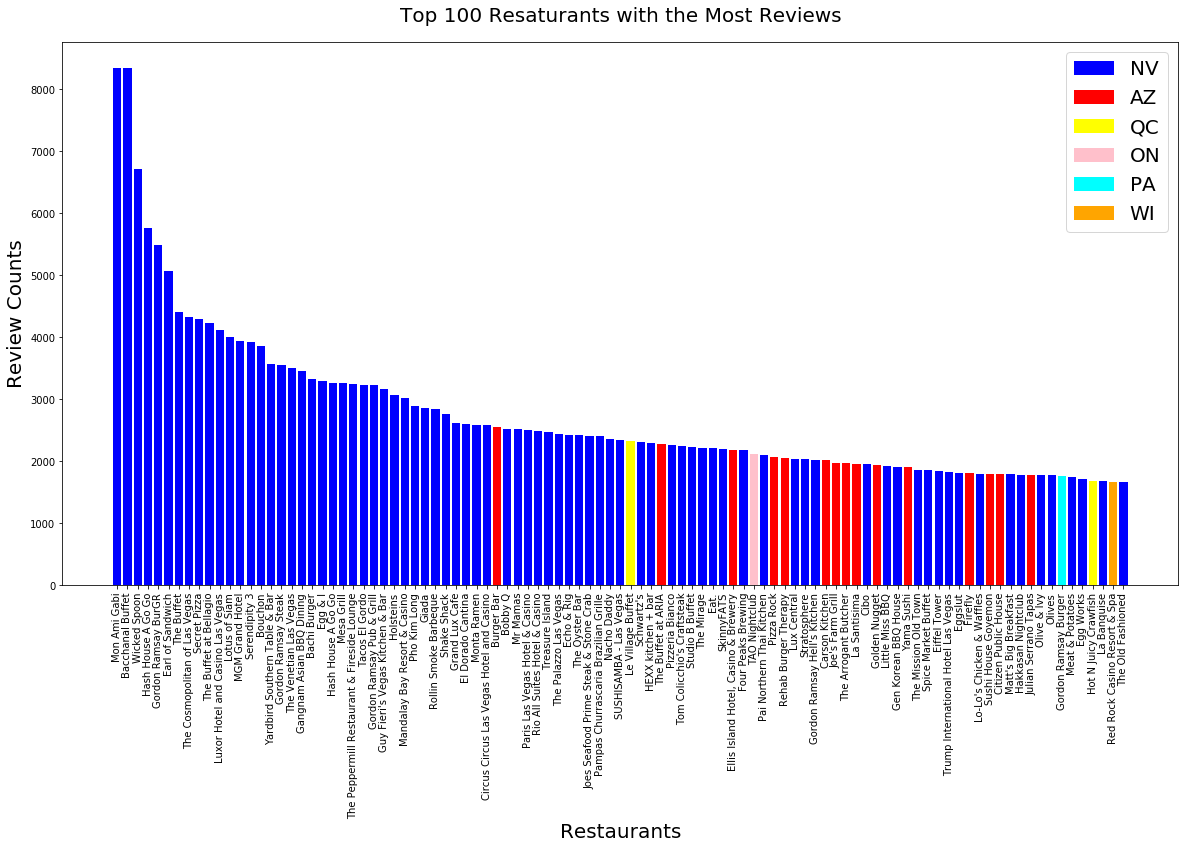

In [21]:
colors = ['blue', 'red', 'yellow', 'pink', 'cyan', 'orange']
import matplotlib.pyplot as plt

st = {}
for idx, s in enumerate(state):
    st[idx] = most_reviews[most_reviews['state'] == s]

fig, ax = plt.subplots(figsize=[20,10])
ax.set_title('Top 100 Resaturants with the Most Reviews', fontsize=20, pad=20)
ax.bar(most_reviews['name'], most_reviews['review_count'])
for idx, s in enumerate(state):
    ax.bar(st[idx]['name'], st[idx]['review_count'], color=colors[idx], label=s)
ax.set_xticklabels(most_reviews['name'], rotation=90)
ax.set_xlabel('Restaurants', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
plt.legend(fontsize=20)

plt.savefig('images/top_100_restaurants.png', bbox_inches = "tight")

In [46]:
states_review = business_review.groupby('state')
src = states_review.count()['review_id']
src

state
AB       64029
AL           3
AR           7
AZ     1191691
BC           3
CA           4
CON          3
FL          10
IL       28741
NC      272619
NE           8
NM          14
NV     1391673
NY          95
OH      227182
ON      574245
PA      204438
QC      137992
SC       14401
TX        1010
VA           9
VT           5
WA           3
WI       93488
XGM          3
XWY          8
Name: review_id, dtype: int64

In [44]:
src = states_review.count()['review_id']

# src = pd.DataFrame(list(src.items()), columns=['State', 'Count'])
# src
# # src_filter = src[src['Count'] == 10000]
# # src.head(1)['Count']

,State,Count
0,AB,64029
1,AL,3
2,AR,7
3,AZ,1191691
4,BC,3
5,CA,4
6,CON,3
7,FL,10
8,IL,28741
9,NC,272619


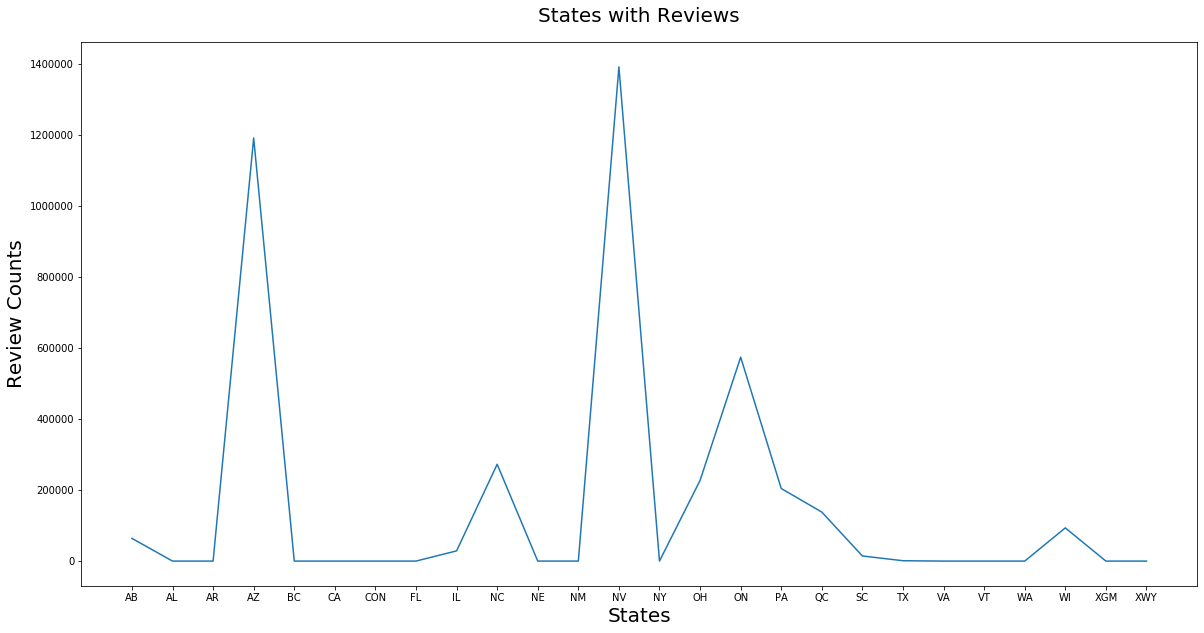

In [47]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with Reviews', fontsize=20, pad=20)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Review Counts', fontsize=20)
ax.plot(src)

plt.savefig('images/states_with_reviews.png', bbox_inches = "tight")

In [52]:
st_re = src.sort_values(ascending=False)
st_re.head(7)

state
NV    1391673
AZ    1191691
ON     574245
NC     272619
OH     227182
PA     204438
QC     137992
Name: review_id, dtype: int64

In [49]:
business_review.head(10)

,_id_x,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,hours,_id_y,review_id,user_id,stars_y,useful,funny,cool,text,date
0,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d5d639ab4c519e5bcfd,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d65639ab4c519e5dec1,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6a639ab4c519e5f6fc,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d6b639ab4c519e5fbdc,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1,0,0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d71639ab4c519e61308,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2,1,2,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
5,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d71639ab4c519e61476,fhbL1BO2TCYKpoDLf-3mcg,nyL_LfmAaf15o8aj7WHnPw,4.0,0,0,0,"I've been a frequent at this place for years, ...",2016-08-13 20:31:21
6,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d74639ab4c519e61fa7,TD5E5NTFqgi1LPbTLlRCjQ,-ga7pQvnJcMB1_pIapHQRQ,3.0,0,0,0,We chose this restaurant for our Chinese New Y...,2015-02-17 00:10:02
7,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d78639ab4c519e63431,4Sg_ziTcrYlGO0dVyj2V3g,agqWketq-FhYwVmRyli4jA,1.0,2,0,0,I went at 230 on a Monday. It was dimsum \n\nI...,2017-01-02 20:32:29
8,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d78639ab4c519e634ec,PNF0KXB9-RJMveiLvgkASw,02AgiiwLg_XAhkvG-wGZKQ,3.0,0,0,1,My family and I were at Emerald yesterday duri...,2016-01-18 17:49:39
9,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,...,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",5e064d7a639ab4c519e63b6c,ijWqxLnjOo9LZpxOVGgCnw,paYZw5wsS25IzzBZtijB8A,4.0,0,0,0,"Because we are in Mississauga, I think this pl...",2015-08-20 03:31:45


In [55]:
review_year = pd.DataFrame({"city": business_review['city'], "state": business_review['state'], 'year': business_review['date'].dt.year})
review_year

AttributeError: Can only use .dt accessor with datetimelike values

In [56]:
# a = review_year[review_year['state'] == 'NV']
# a.groupby('year').count().reset_index()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with more than 100,000 Reviews over the Years', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

for k, v in st_re.head(4).items():
    year_count = review_year[review_year['state'] == k]
    graph_year = year_count.groupby('year').count().reset_index()
    ax.plot(graph_year['year'], graph_year['state'], label=k)

plt.legend(fontsize=20)

fig.savefig('images/states_years.png', bbox_inches = "tight")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1b3b7d9e0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x3ad138f80> (for post_execute):


KeyboardInterrupt: 

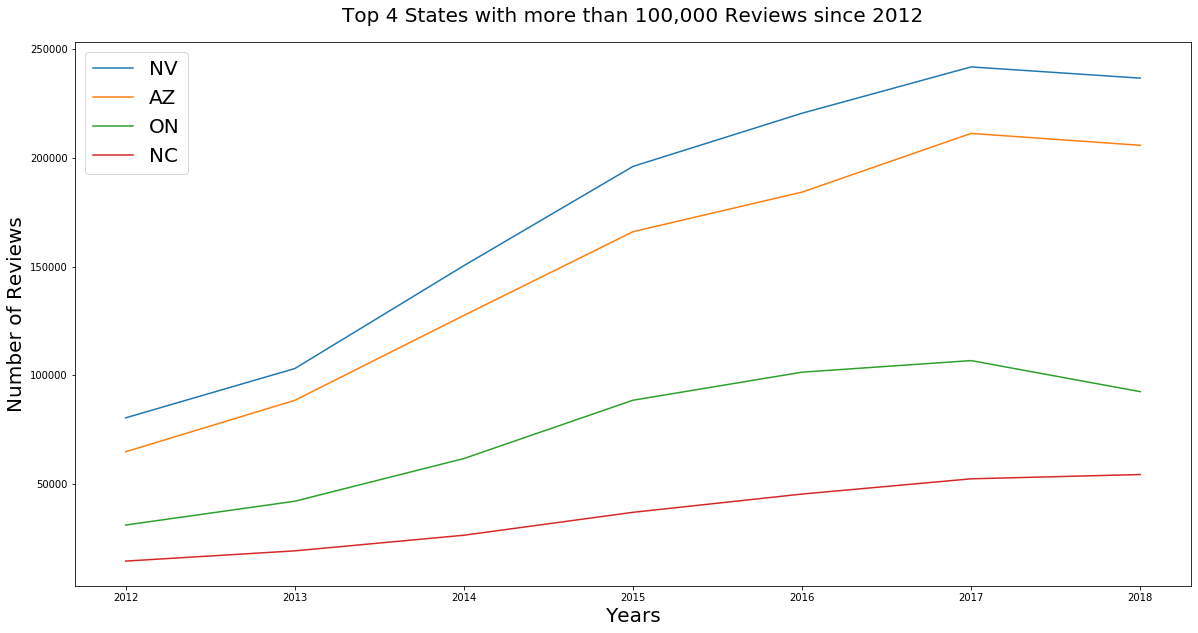

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20, 10])

year2012 = review_year[review_year['year'] >= 2012]

ax.set_title('Top 4 States with more than 100,000 Reviews since 2012', fontsize=20, pad=20)
ax.set_xlabel('Years', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

for k, v in st_re.head(4).items():
    year_count = year2012[year2012['state'] == k]
    graph_year = year_count.groupby('year').count().reset_index()
    ax.plot(graph_year['year'], graph_year['state'], label=k)

plt.legend(fontsize=20)

fig.savefig('images/top_4_2012_states.png', bbox_inches = "tight")

In [120]:
review_stars = business_review.groupby(['name', 'city', 'state', 'business_id'])
review_stars = review_stars.agg({'stars_x': 'mean', 'review_count': 'sum'}).rename(columns={'stars_x': 'stars'}).reset_index()
review_stars

,name,city,state,business_id,stars,review_count
0,#1 Fried Rice,Tolleson,AZ,ysaGG0hm7-ug-IuRd-8_ew,3.5,2024
1,#1 Hawaiian Barbecue,Las Vegas,NV,42yLya7lhe7TQGz3KEdKAw,3.5,1600
2,#1 Hawaiian Barbecue,Las Vegas,NV,gA78_OGp1ekMvZWjRoBmFw,4.0,529
3,#1 Pho,Middleburg Heights,OH,AhD9x2NNFqPvVwmyEZU5Cg,3.5,64
4,#1 Sushi,Phoenix,AZ,kkEqZmVvVkgmCaOqE13mDg,4.0,4160
...,...,...,...,...,...,...
59366,Ôzeu & O'Boeuf,Montréal,QC,aXvnz_IyPLmwMjhb58jOJQ,3.5,506
59367,Überrito,Phoenix,AZ,2tC8oReqFUT0_uVQ3kHePA,4.0,16254
59368,é by José Andrés,Las Vegas,NV,mvyVz0gm3gdPVGg3M-o75g,4.5,142898
59369,Œuf et Bœuf,Montréal,QC,iy-iY6oTECXRLmcegylyKg,3.5,676


In [59]:
sort_review_stars = review_stars.sort_values(by='stars', ascending=False)
hstarsreviews = sort_review_stars[(sort_review_stars['stars'] >= 4.0) & (sort_review_stars['review_count'] >= 100000)]
hstarsreviews

,name,city,state,business_id,stars,review_count
28539,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,3837152
58326,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,5.0,312432
40370,Poke Express,North Las Vegas,NV,ewmTwsZqCHH2gvCeDKz0dw,5.0,304080
25846,Kodo Sushi Sake,Scottsdale,AZ,1qkKfqhO8z2XMzLLDFE96Q,5.0,175950
35097,Not Your Typical Deli,Gilbert,AZ,52yWGkwnrQXIjvuMjYxsiA,5.0,164820
...,...,...,...,...,...,...
11758,Copper Modern Indian Cuisine,Charlotte,NC,ICUCAzUZFiWkYs7iCtNCQg,4.0,141327
11543,Comedor Guadalajara,Phoenix,AZ,pDewiJY6KCcZgLxxgxg13Q,4.0,247000
54963,Tom Colicchio's Craftsteak,Las Vegas,NV,xkVMIk_Vqh17f48ZQ_6b0w,4.0,5259542
43620,Rooster's Uptown,Charlotte,NC,5fquJHY2hMX9tPRD5s0t5g,4.0,208362


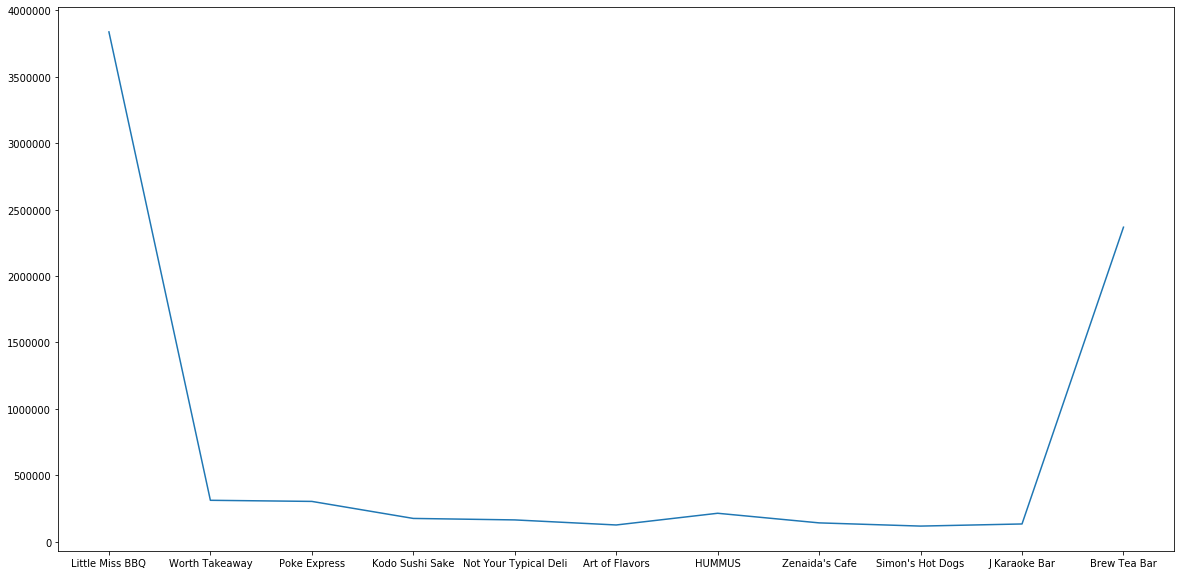

In [60]:
fig, ax = plt.subplots(figsize=[20, 10])

stars = [5.0]

for idx, s in enumerate(stars):
    filtered = hstarsreviews[hstarsreviews['stars'] == s]
    ax.plot(filtered['name'], filtered['review_count'])
    
plt.show()

In [61]:
business_checkin = pd.merge(hstarsreviews, checkin_df, left_on='business_id', right_on='business_id')
business_checkin

,name,city,state,business_id,stars,review_count,_id,date
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,3837152,5e066915639ab4c5194fe821,"2014-02-22 18:54:40, 2014-02-28 18:59:12, 2014..."
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,5.0,312432,5e066908639ab4c5194fb452,"2016-02-12 20:55:22, 2016-02-12 22:49:22, 2016..."
2,Poke Express,North Las Vegas,NV,ewmTwsZqCHH2gvCeDKz0dw,5.0,304080,5e06692b639ab4c5195039af,"2010-03-09 20:13:51, 2010-04-12 00:27:13, 2010..."
3,Kodo Sushi Sake,Scottsdale,AZ,1qkKfqhO8z2XMzLLDFE96Q,5.0,175950,5e0668c0639ab4c5194eacb6,"2016-06-10 11:14:14, 2016-09-29 05:53:36, 2016..."
4,Not Your Typical Deli,Gilbert,AZ,52yWGkwnrQXIjvuMjYxsiA,5.0,164820,5e0668c9639ab4c5194ecbf2,"2016-07-18 20:29:02, 2016-07-21 18:57:05, 2016..."
...,...,...,...,...,...,...,...,...
1703,Copper Modern Indian Cuisine,Charlotte,NC,ICUCAzUZFiWkYs7iCtNCQg,4.0,141327,5e0668ec639ab4c5194f4ee9,"2010-04-28 21:32:55, 2010-05-13 22:12:54, 2010..."
1704,Comedor Guadalajara,Phoenix,AZ,pDewiJY6KCcZgLxxgxg13Q,4.0,247000,5e066947639ab4c519509f57,"2010-05-01 18:44:29, 2010-06-22 19:31:07, 2010..."
1705,Tom Colicchio's Craftsteak,Las Vegas,NV,xkVMIk_Vqh17f48ZQ_6b0w,4.0,5259542,5e06695d639ab4c51950f2e9,"2010-01-21 02:33:22, 2010-01-29 07:03:16, 2010..."
1706,Rooster's Uptown,Charlotte,NC,5fquJHY2hMX9tPRD5s0t5g,4.0,208362,5e0668ca639ab4c5194ed24a,"2012-03-11 02:10:46, 2012-03-16 23:09:39, 2012..."


In [63]:
# business_checkin.head(10)['date'].apply(len)

business_checkin['checkin_count'] = business_checkin.get('date').apply(len)
business_checkin

,name,city,state,business_id,stars,review_count,_id,date,checkin_count
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,3837152,5e066915639ab4c5194fe821,"2014-02-22 18:54:40, 2014-02-28 18:59:12, 2014...",59197
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,5.0,312432,5e066908639ab4c5194fb452,"2016-02-12 20:55:22, 2016-02-12 22:49:22, 2016...",17029
2,Poke Express,North Las Vegas,NV,ewmTwsZqCHH2gvCeDKz0dw,5.0,304080,5e06692b639ab4c5195039af,"2010-03-09 20:13:51, 2010-04-12 00:27:13, 2010...",47815
3,Kodo Sushi Sake,Scottsdale,AZ,1qkKfqhO8z2XMzLLDFE96Q,5.0,175950,5e0668c0639ab4c5194eacb6,"2016-06-10 11:14:14, 2016-09-29 05:53:36, 2016...",18100
4,Not Your Typical Deli,Gilbert,AZ,52yWGkwnrQXIjvuMjYxsiA,5.0,164820,5e0668c9639ab4c5194ecbf2,"2016-07-18 20:29:02, 2016-07-21 18:57:05, 2016...",6088
...,...,...,...,...,...,...,...,...,...
1703,Copper Modern Indian Cuisine,Charlotte,NC,ICUCAzUZFiWkYs7iCtNCQg,4.0,141327,5e0668ec639ab4c5194f4ee9,"2010-04-28 21:32:55, 2010-05-13 22:12:54, 2010...",12850
1704,Comedor Guadalajara,Phoenix,AZ,pDewiJY6KCcZgLxxgxg13Q,4.0,247000,5e066947639ab4c519509f57,"2010-05-01 18:44:29, 2010-06-22 19:31:07, 2010...",29524
1705,Tom Colicchio's Craftsteak,Las Vegas,NV,xkVMIk_Vqh17f48ZQ_6b0w,4.0,5259542,5e06695d639ab4c51950f2e9,"2010-01-21 02:33:22, 2010-01-29 07:03:16, 2010...",69613
1706,Rooster's Uptown,Charlotte,NC,5fquJHY2hMX9tPRD5s0t5g,4.0,208362,5e0668ca639ab4c5194ed24a,"2012-03-11 02:10:46, 2012-03-16 23:09:39, 2012...",20179


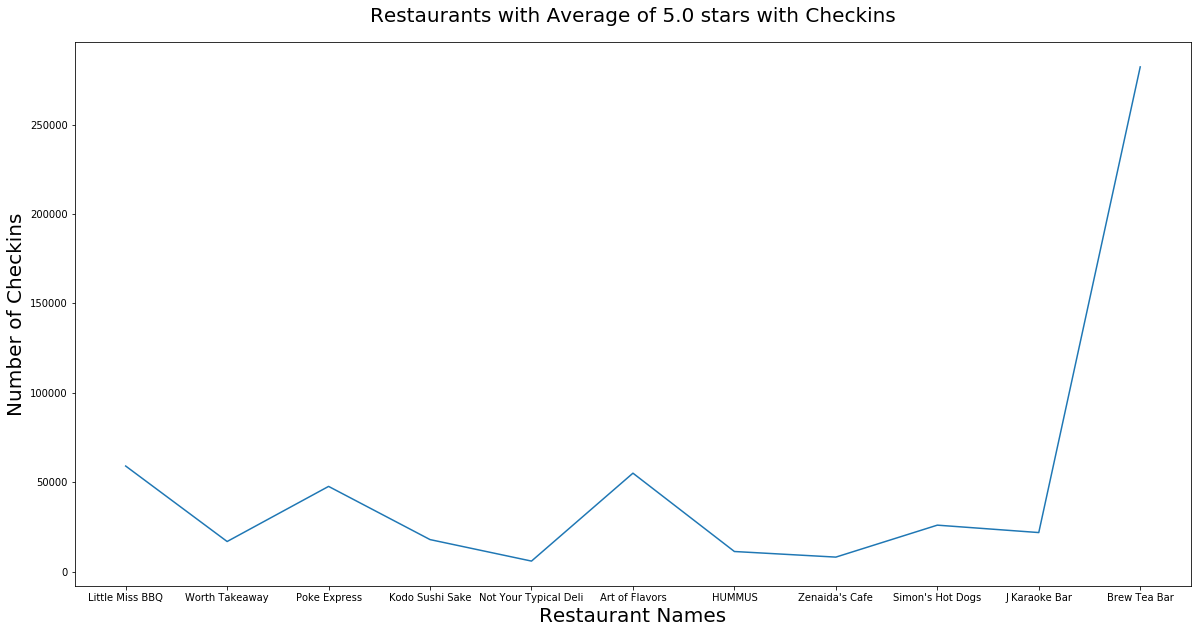

In [64]:
fig, ax = plt.subplots(figsize=[20, 10])

fiveStars = business_checkin[business_checkin['stars'] == 5.0]

ax.set_title('Restaurants with Average of 5.0 stars with Checkins', fontsize=20, pad=20)
ax.plot(fiveStars['name'], fiveStars['checkin_count'])
ax.set_xlabel('Restaurant Names', fontsize=20)
ax.set_ylabel('Number of Checkins', fontsize=20)
    
plt.show()

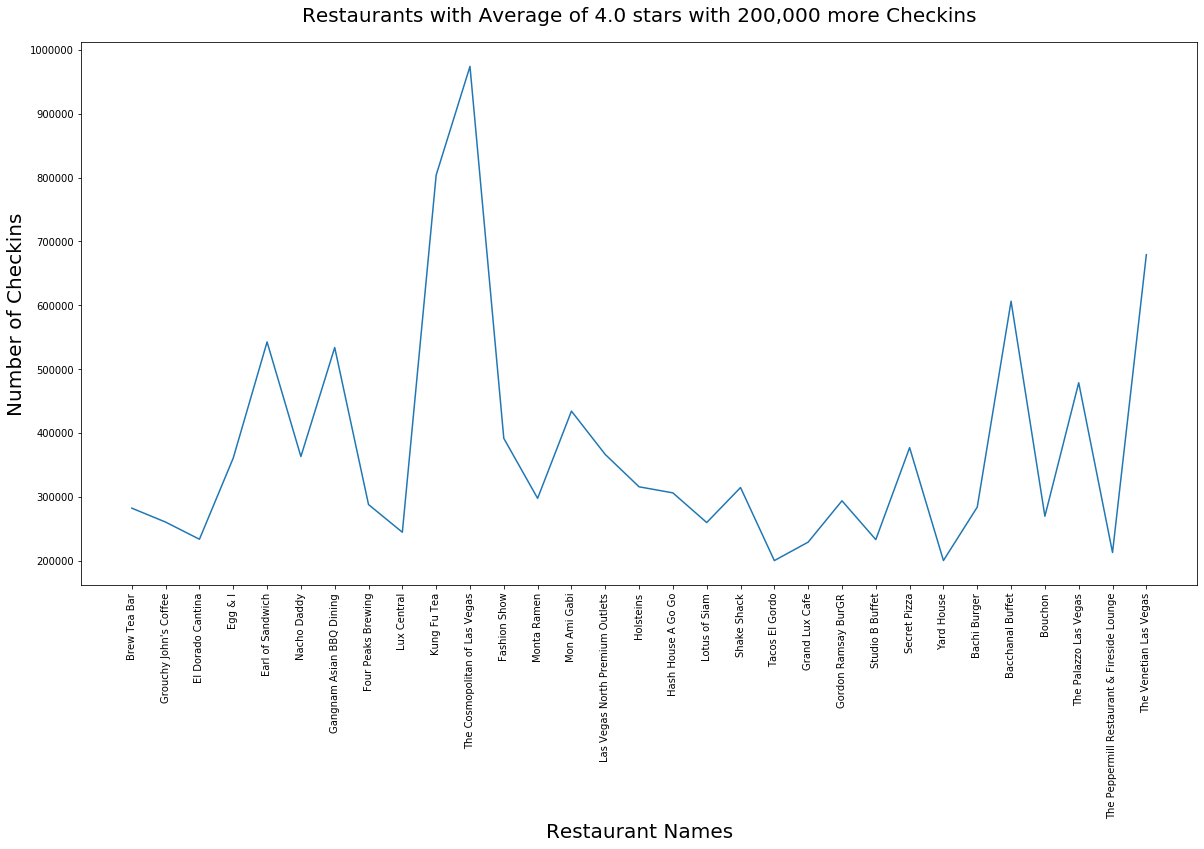

In [149]:
fig, ax = plt.subplots(figsize=[20, 10])

fourStars = business_checkin[(business_checkin['stars'] >= 4.0) & (business_checkin['checkin_count'] >= 200000)]

ax.set_title('Restaurants with Average of 4.0 stars with 200,000 more Checkins', fontsize=20, pad=20)
ax.plot(fourStars['name'], fourStars['checkin_count'])
ax.set_xlabel('Restaurant Names', fontsize=20)
ax.set_xticklabels(fourStars['name'], rotation=90)
ax.set_ylabel('Number of Checkins', fontsize=20)
    
plt.show()

# business_checkin[(business_checkin['stars'] == 4.0) & (business_checkin['checkin_count'] >= 100000)]

In [65]:
fourStars = business_checkin[(business_checkin['stars'] >= 4.0)]

stars_attributes = pd.merge(fourStars, restaurant_df, left_on='business_id', right_on='business_id')
stars_attributes = stars_attributes.drop(columns=['latitude', 'longitude', 'stars_y', 'review_count_y', 'is_open', 'date', 'postal_code','name_y', 'city_y', 'state_y', '_id_x', '_id_y'])
stars_attributes = stars_attributes.rename(columns={'name_x': 'name','city_x': 'city', 'state_x': 'state', 'stars_x': 'stars', 'review_count_x': 'review_count'})
stars_attributes



,name,city,state,business_id,stars,review_count,checkin_count,address,attributes,categories,hours
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,3837152,59197,4301 E University Dr,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Barbeque, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,5.0,312432,17029,218 W Main St,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","American (Traditional), Breakfast & Brunch, Sa...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '..."
2,Poke Express,North Las Vegas,NV,ewmTwsZqCHH2gvCeDKz0dw,5.0,304080,47815,"655 W Craig Rd, Ste 118","{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Food, Poke, Hawaiian, Specialty F...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
3,Kodo Sushi Sake,Scottsdale,AZ,1qkKfqhO8z2XMzLLDFE96Q,5.0,175950,18100,"15040 N Northsight Blvd, Ste 104","{'RestaurantsTableService': 'True', 'BusinessA...","Sushi Bars, Japanese, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."
4,Not Your Typical Deli,Gilbert,AZ,52yWGkwnrQXIjvuMjYxsiA,5.0,164820,6088,"1166 South Gilbert Rd, Ste 101","{'RestaurantsDelivery': 'False', 'BusinessPark...","Restaurants, Caterers, Cuban, Sandwiches, Even...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...
1703,Copper Modern Indian Cuisine,Charlotte,NC,ICUCAzUZFiWkYs7iCtNCQg,4.0,141327,12850,311 East Blvd,"{'BikeParking': 'True', 'RestaurantsGoodForGro...","Pakistani, Bars, Indian, Restaurants, Wine Bar...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1704,Comedor Guadalajara,Phoenix,AZ,pDewiJY6KCcZgLxxgxg13Q,4.0,247000,29524,1830 S Central Ave,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Event Planning & Services, Mexican, Party & Ev...","{'Wednesday': '8:0-20:0', 'Thursday': '8:0-20:..."
1705,Tom Colicchio's Craftsteak,Las Vegas,NV,xkVMIk_Vqh17f48ZQ_6b0w,4.0,5259542,69613,3799 Las Vegas Blvd S,"{'Corkage': 'False', 'RestaurantsPriceRange2':...","Food, Desserts, Steakhouses, American (New), R...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1706,Rooster's Uptown,Charlotte,NC,5fquJHY2hMX9tPRD5s0t5g,4.0,208362,20179,150 N College St,"{'WiFi': 'u'free'', 'RestaurantsTakeOut': 'Tru...","American (New), French, Restaurants, Italian, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [66]:
stars_attributes = stars_attributes.sort_values(by=['stars'], ascending=False)
stars_attributes

,name,city,state,business_id,stars,review_count,checkin_count,address,attributes,categories,hours
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,5.0,3837152,59197,4301 E University Dr,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Barbeque, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
6,HUMMUS,Henderson,NV,q2GzUNQj998GSC8IhkN9hg,5.0,214812,11443,"10895 S Eastern Ave, Ste 100","{'OutdoorSeating': 'True', 'Alcohol': 'u'none'...","Mediterranean, Juice Bars & Smoothies, Food, C...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ..."
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,5.0,312432,17029,218 W Main St,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","American (Traditional), Breakfast & Brunch, Sa...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '..."
10,Brew Tea Bar,Las Vegas,NV,IhNASEZ3XnBHmuuVnWdIwA,5.0,2367432,282175,"7380 S Rainbow Blvd, Ste 101","{'Alcohol': ''none'', 'BusinessAcceptsCreditCa...","Tea Rooms, Desserts, Cafes, Restaurants, Food,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
8,Simon's Hot Dogs,Scottsdale,AZ,xCL38K0oPgK3ydzg4CrvKg,5.0,118320,26164,"4280 Drinkwater Blvd, Ste 200","{'RestaurantsTableService': 'False', 'Wheelcha...","Vegetarian, Latin American, Vegan, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...
920,Taqueria Guadalajara,Madison,WI,S3-JpB5dBhMXmauMqeoN-g,4.0,141327,10477,1033 S Park St,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Mexican","{'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22..."
919,Stax Burger Bistro,Scottsdale,AZ,p6EUf6c9GCfG7seS_wfFyA,4.0,135736,45064,4400 N Scottsdale Rd,"{'OutdoorSeating': 'True', 'BusinessParking': ...","American (New), Restaurants, Nightlife, Burger...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
918,Girasole Restaurant,Pittsburgh,PA,j54J0Ky4ruVbN_NTJ3daFg,4.0,132788,8440,733 Copeland St,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Italian","{'Tuesday': '11:30-22:0', 'Wednesday': '11:30-..."
917,Sansotei Ramen,Toronto,ON,f5O7v_X_jCg2itqacRfxhg,4.0,643140,36118,179 Dundas Street W,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Restaurants, Ramen, Japanese, Noodles","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [67]:
state = []

for s in stars_attributes.state.unique():
    state.append(s)
    
state

['AZ', 'NV', 'PA', 'ON', 'OH', 'SC', 'NC', 'QC', 'WI', 'AB', 'IL', 'TX']

In [183]:
states_stars_attributes = stars_attributes.groupby('state')
states_stars_attributes = states_stars_attributes.agg({'business_id': 'count', 'review_count': 'sum'}).reset_index()
states_stars_attributes 

,state,business_id,review_count
0,AB,1,169330
1,AZ,619,292766906
2,IL,7,1867805
3,NC,94,32226310
4,NV,726,964097956
5,OH,46,13905817
6,ON,95,30587284
7,PA,53,20051641
8,QC,37,17910183
9,SC,3,499909


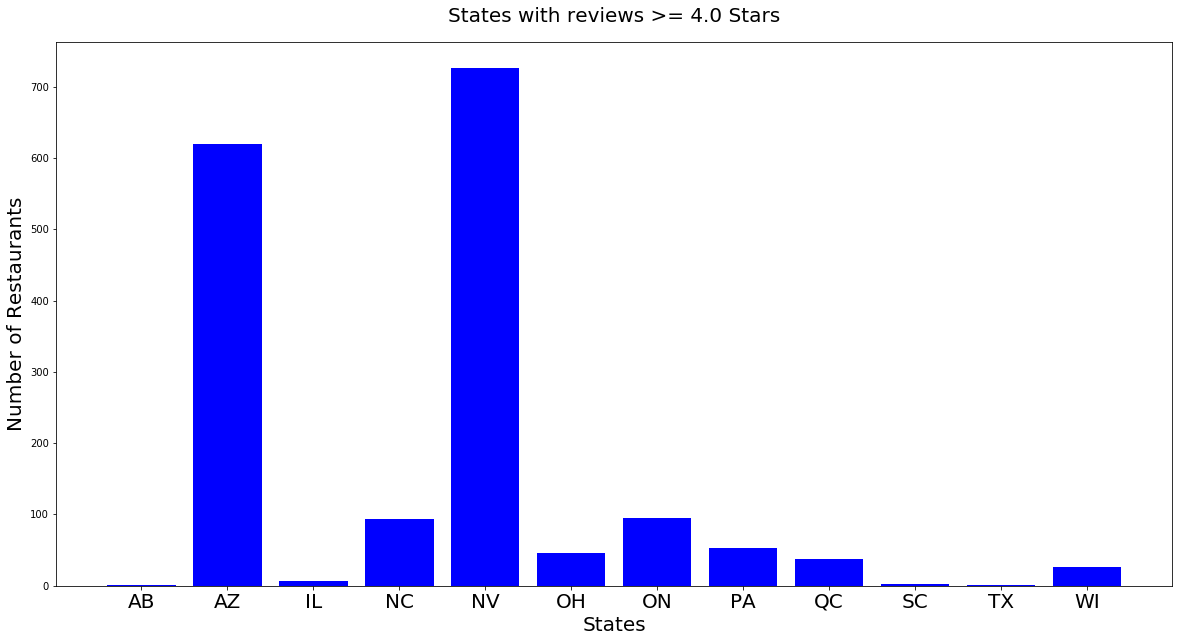

In [192]:
states_stars_attributes = pd.DataFrame(states_stars_attributes)

fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('States with reviews >= 4.0 Stars', fontsize=20, pad=20)
# ax.bar(states_stars_attributes['state'], states_stars_attributes['review_count'], color='red')
ax.bar(states_stars_attributes['state'], states_stars_attributes['business_id'], color='blue')
ax.set_xlabel('States', fontsize=20)
ax.set_xticklabels(states_stars_attributes['state'], fontsize=20)
ax.set_ylabel('Number of Restaurants', fontsize=20)

fig.savefig('images/states_reviews_4_stars.png', bbox_inches = "tight")

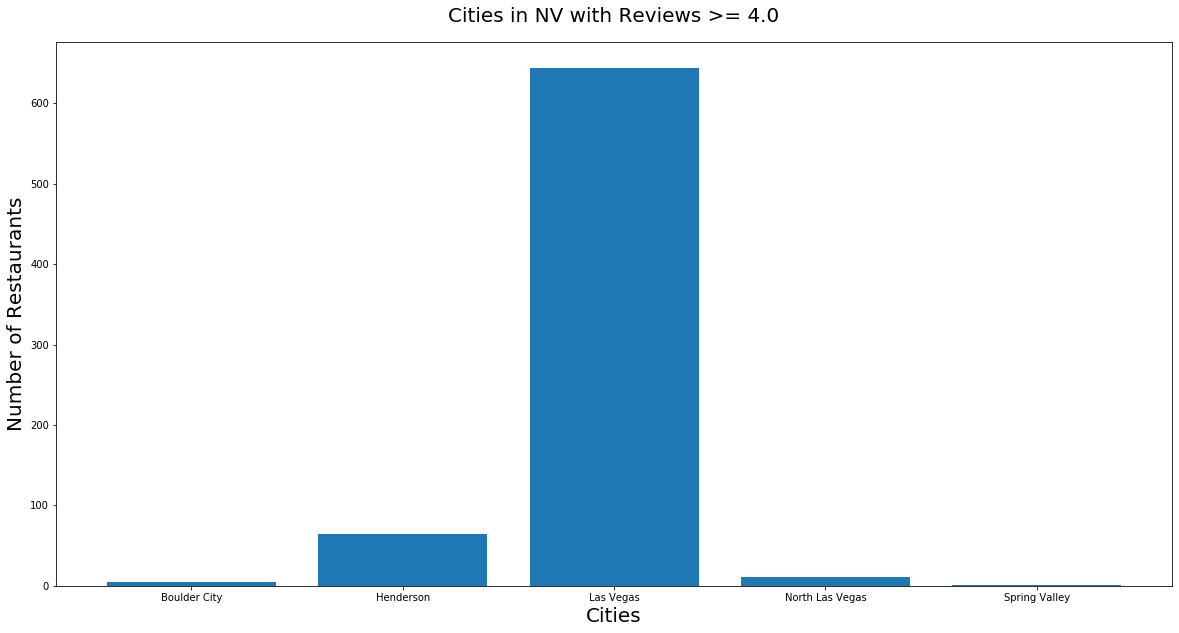

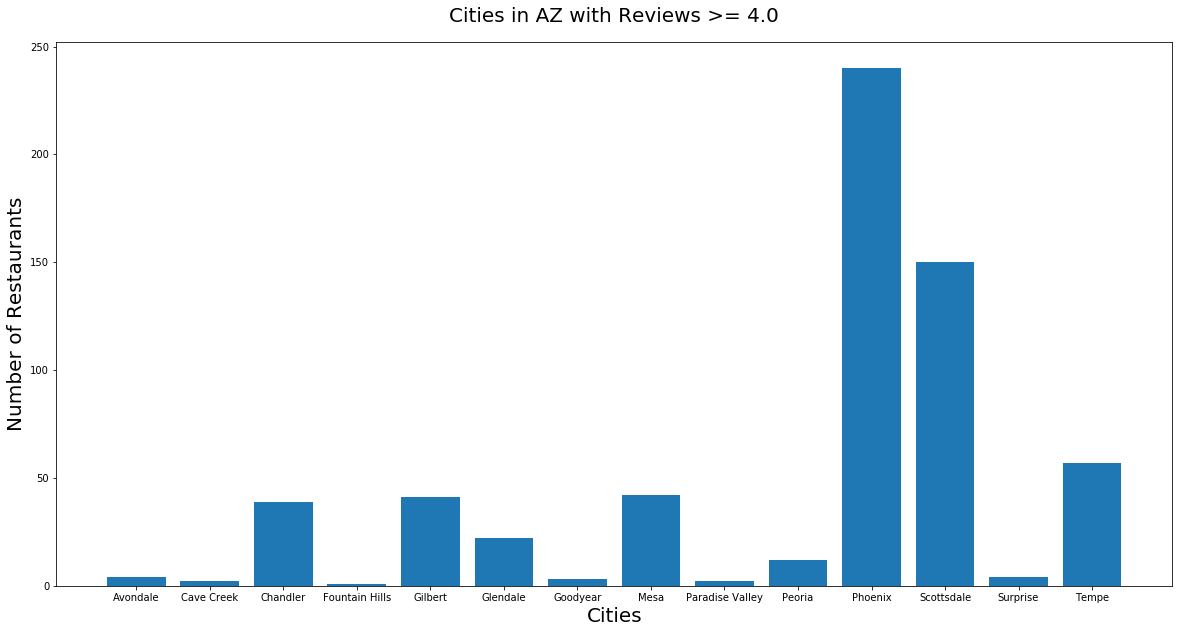

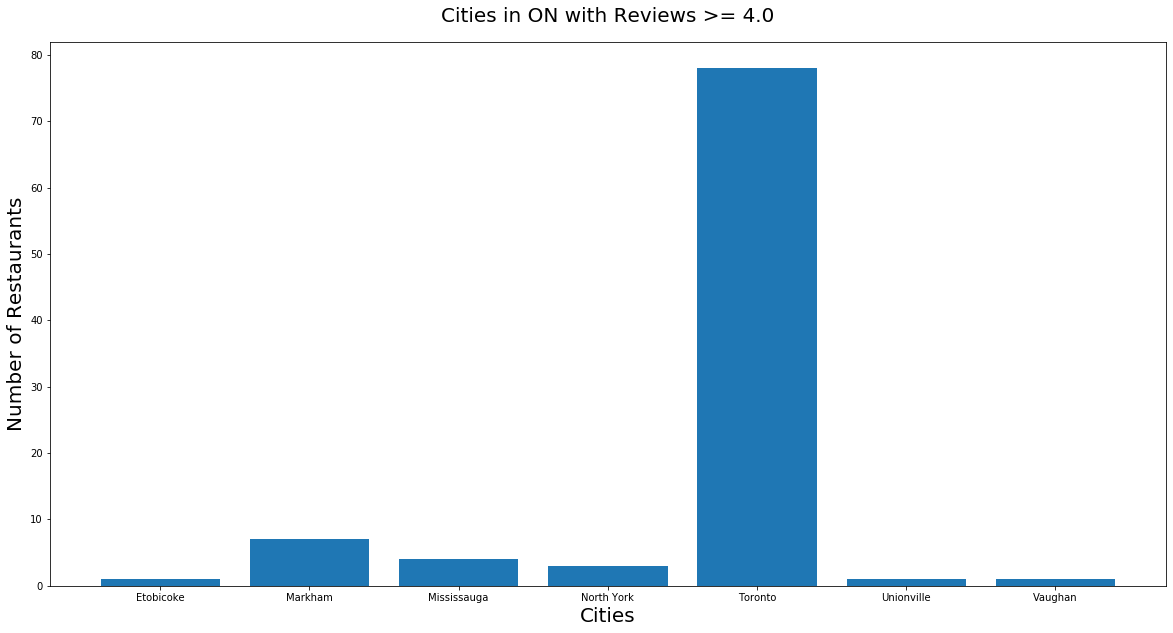

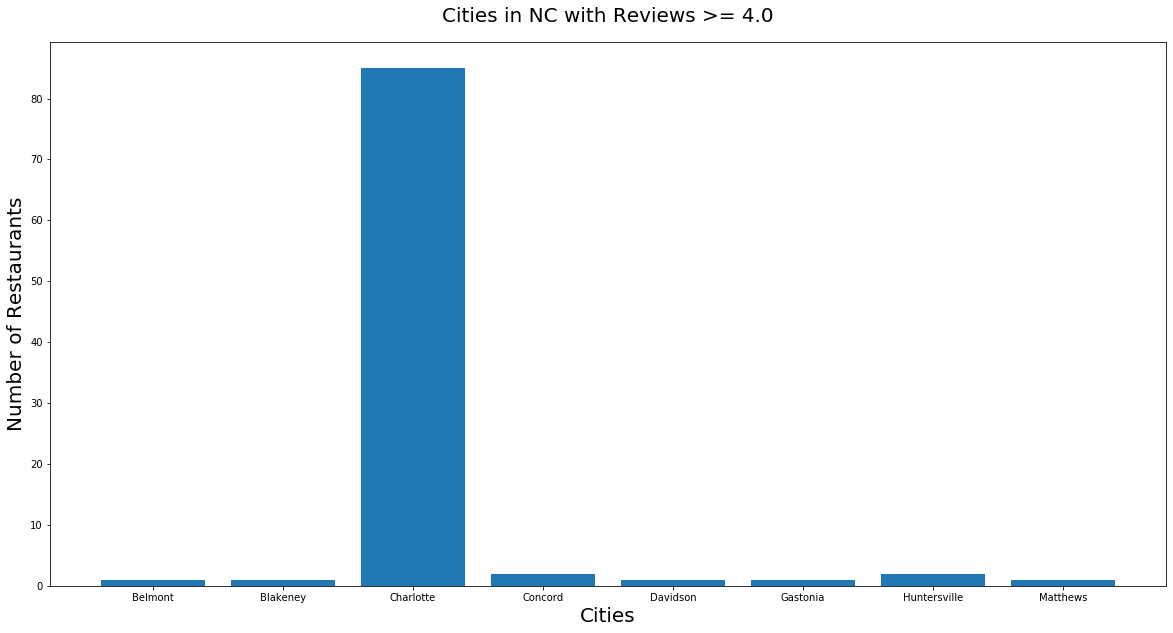

In [193]:
st = []

for s in states_stars_attributes.sort_values(by=['business_id'], ascending=False).head(4).state.unique():
    st.append(s)

for idx, s in enumerate(st):
    fig, ax = plt.subplots(figsize=[20,10])
    state[idx] = stars_attributes[stars_attributes['state'] == s].groupby('city').count()['business_id'].reset_index()
    
    ax.set_title("Cities in {} with Reviews >= 4.0".format(s), fontsize=20, pad=20)
    ax.bar(state[idx]['city'], state[idx]['business_id'])
    ax.set_xlabel('Cities', fontsize=20)
    ax.set_xticklabels(state[idx]['city'])
    ax.set_ylabel('Number of Restaurants', fontsize=20)
    
    fig.savefig("images/cities_in_state_{}.png".format(s), bbox_inches = "tight")

In [75]:
cat_reviews = pd.DataFrame({'name': stars_attributes['name'], 'business_id': stars_attributes['business_id'], 'city': stars_attributes['city'], 'state': stars_attributes['state'], 'categories': stars_attributes['categories'], 'attributes': stars_attributes['attributes']})
cat_reviews

,name,business_id,city,state,categories,attributes
0,Little Miss BBQ,Xg5qEQiB-7L6kGJ5F4K3bQ,Phoenix,AZ,"Barbeque, Restaurants","{'BusinessAcceptsCreditCards': 'True', 'Restau..."
6,HUMMUS,q2GzUNQj998GSC8IhkN9hg,Henderson,NV,"Mediterranean, Juice Bars & Smoothies, Food, C...","{'OutdoorSeating': 'True', 'Alcohol': 'u'none'..."
1,Worth Takeaway,SSCH4Z2gw-hh2KZy7aH4qw,Mesa,AZ,"American (Traditional), Breakfast & Brunch, Sa...","{'RestaurantsGoodForGroups': 'False', 'GoodFor..."
10,Brew Tea Bar,IhNASEZ3XnBHmuuVnWdIwA,Las Vegas,NV,"Tea Rooms, Desserts, Cafes, Restaurants, Food,...","{'Alcohol': ''none'', 'BusinessAcceptsCreditCa..."
8,Simon's Hot Dogs,xCL38K0oPgK3ydzg4CrvKg,Scottsdale,AZ,"Vegetarian, Latin American, Vegan, Restaurants...","{'RestaurantsTableService': 'False', 'Wheelcha..."
...,...,...,...,...,...,...
920,Taqueria Guadalajara,S3-JpB5dBhMXmauMqeoN-g,Madison,WI,"Restaurants, Mexican","{'GoodForKids': 'True', 'BusinessAcceptsCredit..."
919,Stax Burger Bistro,p6EUf6c9GCfG7seS_wfFyA,Scottsdale,AZ,"American (New), Restaurants, Nightlife, Burger...","{'OutdoorSeating': 'True', 'BusinessParking': ..."
918,Girasole Restaurant,j54J0Ky4ruVbN_NTJ3daFg,Pittsburgh,PA,"Restaurants, Italian","{'BusinessParking': '{'garage': False, 'street..."
917,Sansotei Ramen,f5O7v_X_jCg2itqacRfxhg,Toronto,ON,"Restaurants, Ramen, Japanese, Noodles","{'NoiseLevel': 'u'average'', 'RestaurantsAttir..."


In [76]:
cat = {}

for k, v in cat_reviews.items():
    if k == 'categories':
        r = v.str.split(",")
        for idx, ab in enumerate(r):
            for ele in r[idx]:
                eles = ele.strip()
                if eles in cat:
                    cat[eles] += 1
                else:
                    cat[eles] = 1
                

cat

{'Barbeque': 84,
 'Restaurants': 1708,
 'American (Traditional)': 308,
 'Breakfast & Brunch': 352,
 'Sandwiches': 195,
 'American (New)': 386,
 'Food': 525,
 'Poke': 12,
 'Hawaiian': 34,
 'Specialty Food': 68,
 'Ethnic Food': 30,
 'Sushi Bars': 136,
 'Japanese': 174,
 'Caterers': 54,
 'Cuban': 4,
 'Event Planning & Services': 104,
 'Delis': 27,
 'Gelato': 5,
 'Ice Cream & Frozen Yogurt': 20,
 'Desserts': 100,
 'Mediterranean': 81,
 'Juice Bars & Smoothies': 41,
 'Vegan': 87,
 'Wraps': 5,
 'Fast Food': 39,
 'Gluten-Free': 67,
 'Middle Eastern': 36,
 'Cafes': 106,
 'Vegetarian': 96,
 'Latin American': 28,
 'Colombian': 3,
 'Hot Dogs': 21,
 'Bars': 442,
 'Korean': 44,
 'Asian Fusion': 122,
 'Cocktail Bars': 107,
 'Nightlife': 456,
 'Karaoke': 7,
 'Tea Rooms': 6,
 'Bubble Tea': 10,
 'Patisserie/Cake Shop': 6,
 'Bakeries': 64,
 'Thai': 64,
 'Noodles': 45,
 'Chicken Wings': 34,
 'Chinese': 51,
 'Soup': 29,
 'Canadian (New)': 21,
 'Italian': 183,
 'Seafood': 197,
 'Pizza': 172,
 'Comfort Food

In [77]:
cat_df = pd.DataFrame(list(cat.items()), columns=['Category Name', 'Count'])
cat_df = cat_df.sort_values(by=['Count'], ascending=False)
cat_df = cat_df[(cat_df['Category Name'] != 'Restaurants') & (cat_df['Category Name'] != 'Food')]
cat_df

,Category Name,Count
36,Nightlife,456
32,Bars,442
5,American (New),386
3,Breakfast & Brunch,352
2,American (Traditional),308
...,...,...
96,Venezuelan,1
168,Cambodian,1
210,Hungarian,1
211,International,1


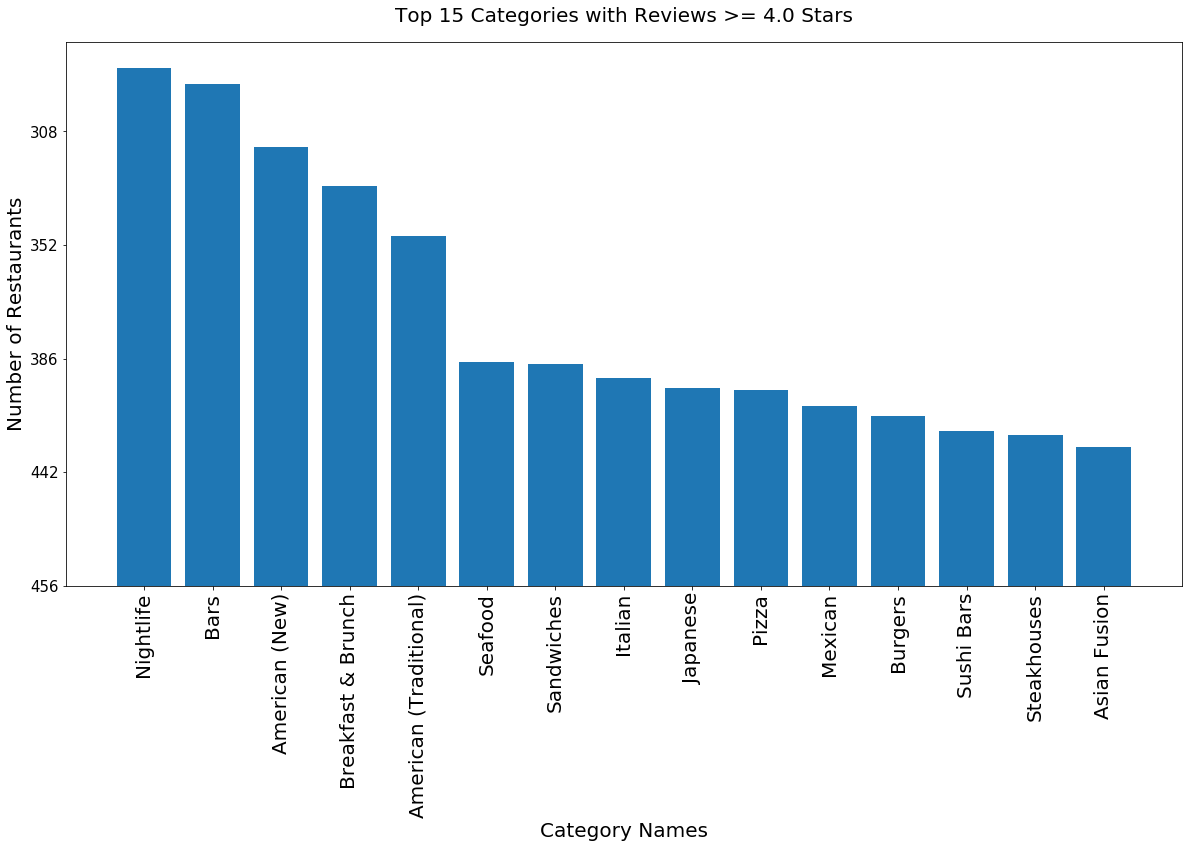

In [194]:
fig, ax = plt.subplots(figsize=[20, 10])


top_few = cat_df.head(15)
ax.bar(top_few['Category Name'], top_few['Count'])
ax.set_title('Top 15 Categories with Reviews >= 4.0 Stars', fontsize=20, pad=20)
ax.set_xticklabels(top_few['Category Name'], rotation=90, fontsize=20)
ax.set_yticklabels(top_few['Count'], fontsize=15)

ax.set_xlabel('Category Names', fontsize=20)
ax.set_ylabel('Number of Restaurants', fontsize=20)

fig.savefig('images/top_categories.png', bbox_inches = "tight")

In [78]:
att_reviews = pd.DataFrame({'name': stars_attributes['name'], 'city': stars_attributes['city'], 'state': stars_attributes['state'], 'business_id': stars_attributes['business_id'], 'attributes': stars_attributes['attributes']})
att_reviews

,name,city,state,business_id,attributes
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
6,HUMMUS,Henderson,NV,q2GzUNQj998GSC8IhkN9hg,"{'OutdoorSeating': 'True', 'Alcohol': 'u'none'..."
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,"{'RestaurantsGoodForGroups': 'False', 'GoodFor..."
10,Brew Tea Bar,Las Vegas,NV,IhNASEZ3XnBHmuuVnWdIwA,"{'Alcohol': ''none'', 'BusinessAcceptsCreditCa..."
8,Simon's Hot Dogs,Scottsdale,AZ,xCL38K0oPgK3ydzg4CrvKg,"{'RestaurantsTableService': 'False', 'Wheelcha..."
...,...,...,...,...,...
920,Taqueria Guadalajara,Madison,WI,S3-JpB5dBhMXmauMqeoN-g,"{'GoodForKids': 'True', 'BusinessAcceptsCredit..."
919,Stax Burger Bistro,Scottsdale,AZ,p6EUf6c9GCfG7seS_wfFyA,"{'OutdoorSeating': 'True', 'BusinessParking': ..."
918,Girasole Restaurant,Pittsburgh,PA,j54J0Ky4ruVbN_NTJ3daFg,"{'BusinessParking': '{'garage': False, 'street..."
917,Sansotei Ramen,Toronto,ON,f5O7v_X_jCg2itqacRfxhg,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir..."


In [79]:
attr = att_reviews['attributes'].apply(pd.Series)
attr

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,OutdoorSeating,Alcohol,NoiseLevel,GoodForKids,HasTV,RestaurantsGoodForGroups,RestaurantsTableService,RestaurantsTakeOut,...,HappyHour,CoatCheck,GoodForDancing,BYOBCorkage,BYOB,Corkage,RestaurantsCounterService,DietaryRestrictions,Open24Hours,AgesAllowed
0,True,2,True,u'none',u'average',True,False,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,True,1,True,u'none','average',True,False,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,2,True,u'none',u'average',True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,True,1,True,'none',NaN,True,False,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,True,1,True,u'beer_and_wine','average',True,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,True,1,False,u'beer_and_wine',u'average',True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,True,2,True,'full_bar',u'average',True,True,True,NaN,True,...,NaN,False,NaN,'yes_free',NaN,False,NaN,NaN,NaN,NaN
918,True,2,True,u'full_bar',u'average',False,False,False,True,True,...,NaN,NaN,NaN,'yes_corkage',NaN,True,NaN,NaN,NaN,NaN
917,NaN,2,False,u'beer_and_wine',u'average',True,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
attr_df = pd.concat([att_reviews, attr], axis=1).drop('attributes', axis=1)
attr_df

,name,city,state,business_id,BusinessAcceptsCreditCards,RestaurantsPriceRange2,OutdoorSeating,Alcohol,NoiseLevel,GoodForKids,...,HappyHour,CoatCheck,GoodForDancing,BYOBCorkage,BYOB,Corkage,RestaurantsCounterService,DietaryRestrictions,Open24Hours,AgesAllowed
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,True,2,True,u'none',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HUMMUS,Henderson,NV,q2GzUNQj998GSC8IhkN9hg,True,1,True,u'none','average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,True,2,True,u'none',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Brew Tea Bar,Las Vegas,NV,IhNASEZ3XnBHmuuVnWdIwA,True,1,True,'none',NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Simon's Hot Dogs,Scottsdale,AZ,xCL38K0oPgK3ydzg4CrvKg,True,1,True,u'beer_and_wine','average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,Taqueria Guadalajara,Madison,WI,S3-JpB5dBhMXmauMqeoN-g,True,1,False,u'beer_and_wine',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,Stax Burger Bistro,Scottsdale,AZ,p6EUf6c9GCfG7seS_wfFyA,True,2,True,'full_bar',u'average',True,...,NaN,False,NaN,'yes_free',NaN,False,NaN,NaN,NaN,NaN
918,Girasole Restaurant,Pittsburgh,PA,j54J0Ky4ruVbN_NTJ3daFg,True,2,True,u'full_bar',u'average',False,...,NaN,NaN,NaN,'yes_corkage',NaN,True,NaN,NaN,NaN,NaN
917,Sansotei Ramen,Toronto,ON,f5O7v_X_jCg2itqacRfxhg,NaN,2,False,u'beer_and_wine',u'average',True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1707
Data columns (total 41 columns):
name                          1708 non-null object
city                          1708 non-null object
state                         1708 non-null object
business_id                   1708 non-null object
BusinessAcceptsCreditCards    1593 non-null object
RestaurantsPriceRange2        1706 non-null object
OutdoorSeating                1693 non-null object
Alcohol                       1690 non-null object
NoiseLevel                    1680 non-null object
GoodForKids                   1693 non-null object
HasTV                         1685 non-null object
RestaurantsGoodForGroups      1689 non-null object
RestaurantsTableService       905 non-null object
RestaurantsTakeOut            1698 non-null object
BusinessParking               1701 non-null object
RestaurantsDelivery           1693 non-null object
Caters                        1687 non-null object
RestaurantsAttire          

In [82]:
price_restaurants_df = attr_df.groupby('RestaurantsPriceRange2')
price_restaurants_df = price_restaurants_df.count()['name']
price_restaurants_df = pd.DataFrame(list(price_restaurants_df.items()), columns=['Price', 'Count'])
price_restaurants_df

,Price,Count
0,1,328
1,2,1147
2,3,179
3,4,52


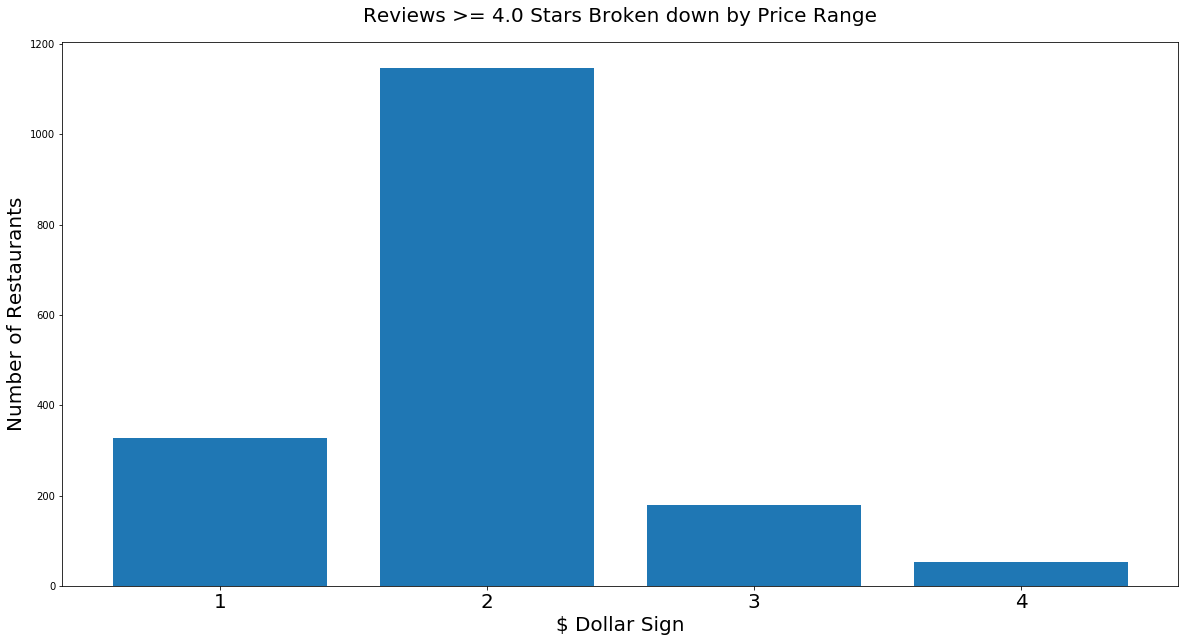

In [195]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.set_title('Reviews >= 4.0 Stars Broken down by Price Range', fontsize=20, pad=20)
ax.bar(price_restaurants_df['Price'], price_restaurants_df['Count'])
ax.set_xlabel('$ Dollar Sign', fontsize=20)
ax.set_ylabel('Number of Restaurants', fontsize=20)

ax.set_xticklabels(price_restaurants_df['Price'], fontsize=20)

fig.savefig('images/reviews_price_range.png', bbox_inches = "tight")

In [84]:
attr_checkin = pd.merge(attr_df, business_checkin, left_on='business_id', right_on='business_id')
attr_checkin

,name_x,city_x,state_x,business_id,BusinessAcceptsCreditCards,RestaurantsPriceRange2,OutdoorSeating,Alcohol,NoiseLevel,GoodForKids,...,Open24Hours,AgesAllowed,name_y,city_y,state_y,stars,review_count,_id,date,checkin_count
0,Little Miss BBQ,Phoenix,AZ,Xg5qEQiB-7L6kGJ5F4K3bQ,True,2,True,u'none',u'average',True,...,NaN,NaN,Little Miss BBQ,Phoenix,AZ,5.0,3837152,5e066915639ab4c5194fe821,"2014-02-22 18:54:40, 2014-02-28 18:59:12, 2014...",59197
1,HUMMUS,Henderson,NV,q2GzUNQj998GSC8IhkN9hg,True,1,True,u'none','average',True,...,NaN,NaN,HUMMUS,Henderson,NV,5.0,214812,5e066949639ab4c51950a770,"2017-09-15 21:29:59, 2017-09-23 20:25:48, 2017...",11443
2,Worth Takeaway,Mesa,AZ,SSCH4Z2gw-hh2KZy7aH4qw,True,2,True,u'none',u'average',True,...,NaN,NaN,Worth Takeaway,Mesa,AZ,5.0,312432,5e066908639ab4c5194fb452,"2016-02-12 20:55:22, 2016-02-12 22:49:22, 2016...",17029
3,Brew Tea Bar,Las Vegas,NV,IhNASEZ3XnBHmuuVnWdIwA,True,1,True,'none',NaN,True,...,NaN,NaN,Brew Tea Bar,Las Vegas,NV,5.0,2367432,5e0668ee639ab4c5194f53ff,"2015-07-03 23:49:12, 2015-07-04 04:09:34, 2015...",282175
4,Simon's Hot Dogs,Scottsdale,AZ,xCL38K0oPgK3ydzg4CrvKg,True,1,True,u'beer_and_wine','average',True,...,NaN,NaN,Simon's Hot Dogs,Scottsdale,AZ,5.0,118320,5e06695c639ab4c51950ed68,"2015-12-03 18:23:36, 2015-12-06 00:16:35, 2015...",26164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,Taqueria Guadalajara,Madison,WI,S3-JpB5dBhMXmauMqeoN-g,True,1,False,u'beer_and_wine',u'average',True,...,NaN,NaN,Taqueria Guadalajara,Madison,WI,4.0,141327,5e066907639ab4c5194fb05a,"2010-06-24 17:13:16, 2010-06-24 17:14:15, 2010...",10477
1704,Stax Burger Bistro,Scottsdale,AZ,p6EUf6c9GCfG7seS_wfFyA,True,2,True,'full_bar',u'average',True,...,NaN,NaN,Stax Burger Bistro,Scottsdale,AZ,4.0,135736,5e066946639ab4c519509e27,"2010-01-22 19:37:55, 2010-02-01 01:45:11, 2010...",45064
1705,Girasole Restaurant,Pittsburgh,PA,j54J0Ky4ruVbN_NTJ3daFg,True,2,True,u'full_bar',u'average',False,...,NaN,NaN,Girasole Restaurant,Pittsburgh,PA,4.0,132788,5e066936639ab4c5195062d8,"2010-07-01 17:30:24, 2010-08-10 23:17:29, 2010...",8440
1706,Sansotei Ramen,Toronto,ON,f5O7v_X_jCg2itqacRfxhg,NaN,2,False,u'beer_and_wine',u'average',True,...,NaN,NaN,Sansotei Ramen,Toronto,ON,4.0,643140,5e06692c639ab4c519503b27,"2012-09-08 22:26:26, 2012-09-08 22:51:25, 2012...",36118


In [85]:
attr_checkin = attr_checkin[attr_checkin['checkin_count'] >= 100000]

<BarContainer object of 4 artists>

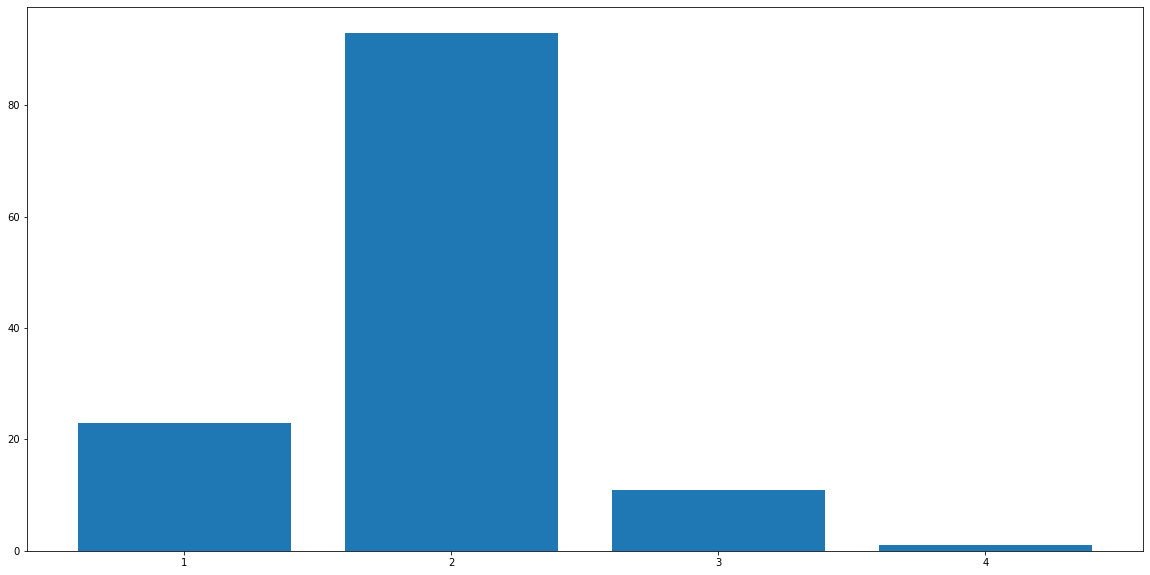

In [86]:
price_restaurants_checkin_df = attr_checkin.groupby('RestaurantsPriceRange2')
price_restaurants_checkin_df = price_restaurants_checkin_df.count()['name_x']
price_restaurants_checkin_df = pd.DataFrame(list(price_restaurants_checkin_df.items()), columns=['Price', 'Count'])
price_restaurants_checkin_df

fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(price_restaurants_checkin_df['Price'], price_restaurants_checkin_df['Count'])

In [87]:
attr_df.groupby('Alcohol').count()

,name,city,state,business_id,BusinessAcceptsCreditCards,RestaurantsPriceRange2,OutdoorSeating,NoiseLevel,GoodForKids,HasTV,...,HappyHour,CoatCheck,GoodForDancing,BYOBCorkage,BYOB,Corkage,RestaurantsCounterService,DietaryRestrictions,Open24Hours,AgesAllowed
Alcohol,,,,,,,,,,,,,,,,,,,,,
'beer_and_wine',103,103,103,103,102,103,103,102,103,102,...,3,3,4,16,0,11,0,0,0,0
'full_bar',270,270,270,270,267,270,270,269,269,270,...,83,62,97,128,8,66,2,1,0,0
'none',113,113,113,113,107,113,113,107,111,109,...,0,0,0,29,0,17,2,0,1,0
u'beer_and_wine',261,261,261,261,241,261,260,261,261,261,...,17,17,23,27,3,16,1,2,1,0
u'full_bar',653,653,653,653,597,653,653,649,652,651,...,153,121,207,55,1,24,0,3,0,1
u'none',290,290,290,290,263,290,289,288,289,288,...,2,2,2,16,2,9,0,0,0,0


In [88]:
attr_df['Alcohol'] = attr_df['Alcohol'].apply(lambda x: str(x).replace("u'", "'"))

In [89]:
attr_df.groupby('Alcohol').count()

,name,city,state,business_id,BusinessAcceptsCreditCards,RestaurantsPriceRange2,OutdoorSeating,NoiseLevel,GoodForKids,HasTV,...,HappyHour,CoatCheck,GoodForDancing,BYOBCorkage,BYOB,Corkage,RestaurantsCounterService,DietaryRestrictions,Open24Hours,AgesAllowed
Alcohol,,,,,,,,,,,,,,,,,,,,,
'beer_and_wine',364,364,364,364,343,364,363,363,364,363,...,20,20,27,43,3,27,1,2,1,0
'full_bar',923,923,923,923,864,923,923,918,921,921,...,236,183,304,183,9,90,2,4,0,1
'none',403,403,403,403,370,403,402,395,400,397,...,2,2,2,45,2,26,2,0,1,0
nan,18,18,18,18,16,16,5,4,8,4,...,1,1,1,0,0,0,0,0,1,0


In [99]:
attr_df['Alcohol'] = attr_df['Alcohol'].apply(lambda x: str(x).replace("u'", "'"))
alcohol_df = attr_df.groupby('Alcohol').count()['name']
alcohol_df = pd.DataFrame(list(alcohol_df.items()), columns=['Alcohol', 'Count'])
alcohol_df = alcohol_df[:-1]
alcohol_df

,Alcohol,Count
0,'beer_and_wine',364
1,'full_bar',923
2,'none',403


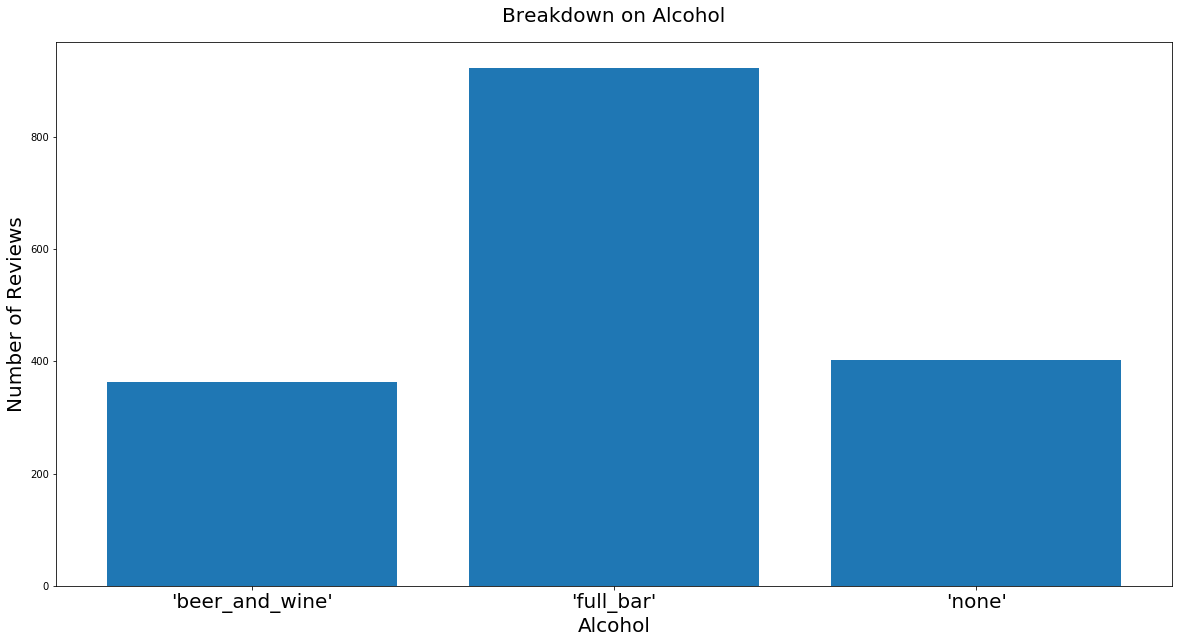

In [100]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(alcohol_df['Alcohol'], alcohol_df['Count'])
ax.set_title('Breakdown on Alcohol', fontsize=20, pad=20)
ax.set_xlabel('Alcohol', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

ax.set_xticklabels(alcohol_df['Alcohol'], fontsize=20)

fig.savefig('images/reviews_alcohol.png', bbox_inches = "tight")

In [97]:
attr_df['RestaurantsAttire'] = attr_df['RestaurantsAttire'].apply(lambda x: str(x).replace("u'", "'"))
attire_df = attr_df.groupby('RestaurantsAttire').count()['name']
attire_df = pd.DataFrame(list(attire_df.items()), columns=['Attire', 'Count'])
attire_df = attire_df[:-1]
attire_df

,Attire,Count
0,'casual',1558
1,'dressy',128


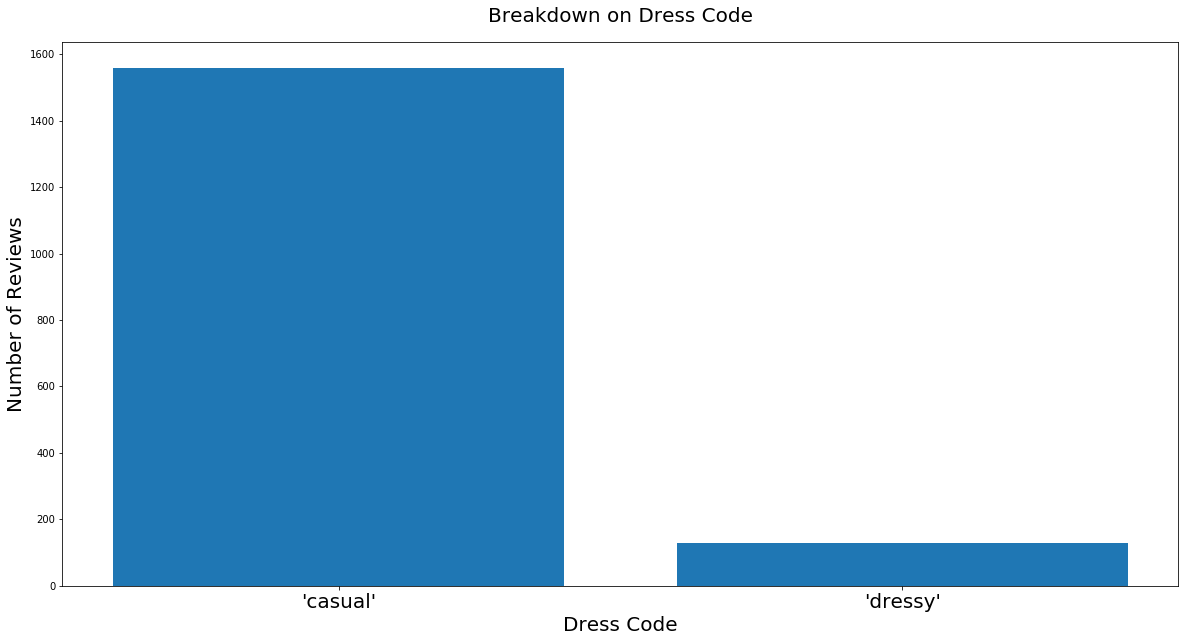

In [98]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(attire_df['Attire'], attire_df['Count'])

ax.set_title('Breakdown on Dress Code', fontsize=20, pad=20)
ax.set_xlabel('Dress Code', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

ax.set_xticklabels(attire_df['Attire'], fontsize=20)

fig.savefig('images/reviews_dress_code.png', bbox_inches = "tight")

In [101]:
attr_df['NoiseLevel'] = attr_df['NoiseLevel'].apply(lambda x: str(x).replace("u'", "'"))
noise_df = attr_df.groupby('NoiseLevel').count()['name']
noise_df = pd.DataFrame(list(noise_df.items()), columns=['Noise Level', 'Count'])
noise_df = noise_df[:-1]
noise_df

,Noise Level,Count
0,'average',1516
1,'loud',79
2,'quiet',74
3,'very_loud',11


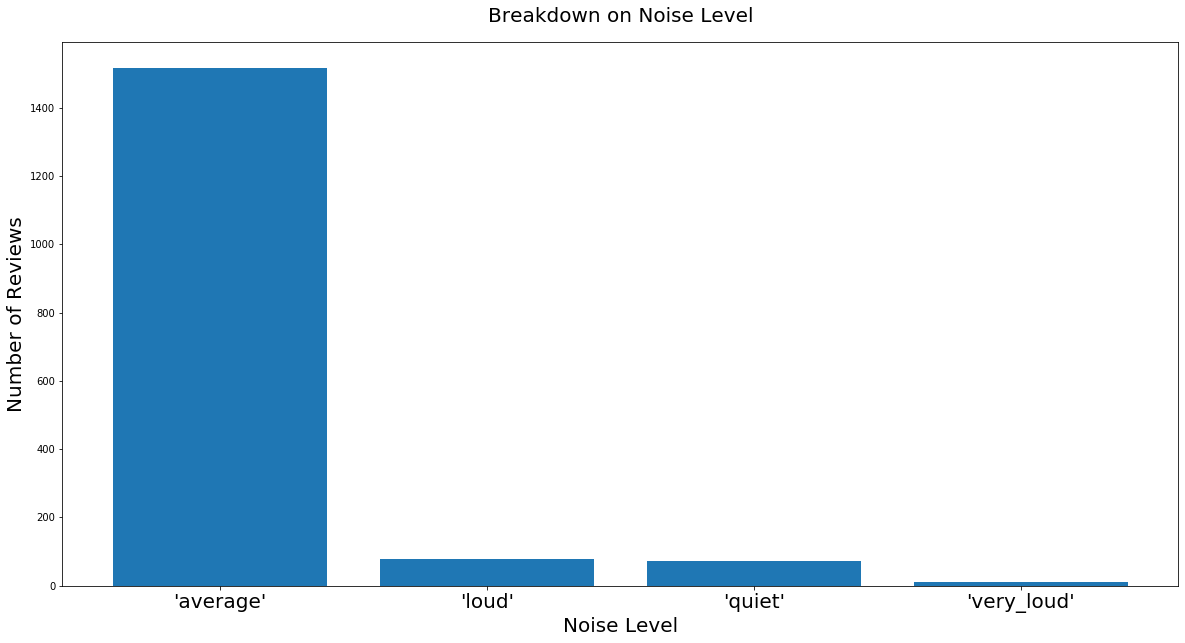

In [102]:
fig, ax = plt.subplots(figsize=[20,10])

ax.bar(noise_df['Noise Level'], noise_df['Count'])

ax.set_title('Breakdown on Noise Level', fontsize=20, pad=20)
ax.set_xlabel('Noise Level', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

ax.set_xticklabels(noise_df['Noise Level'], fontsize=20)

fig.savefig('images/reviews_noise_level.png', bbox_inches = "tight")

In [93]:
amb = {}

ambience_df = attr_df['Ambience'].dropna()
for a in ambience_df:
    a_dict = eval(a)
    if a_dict != None:        
        for k, v in a_dict.items():
            if k in amb:
                if v == True:
                    amb[k] += 1
            else:
                amb[k] = 0

amb

{'romantic': 59,
 'intimate': 33,
 'classy': 148,
 'hipster': 123,
 'divey': 13,
 'touristy': 15,
 'trendy': 361,
 'upscale': 87,
 'casual': 1305}

In [94]:
ambience_df = pd.DataFrame(list(amb.items()), columns=['Ambience', 'Count'])
ambience_df

,Ambience,Count
0,romantic,59
1,intimate,33
2,classy,148
3,hipster,123
4,divey,13
5,touristy,15
6,trendy,361
7,upscale,87
8,casual,1305


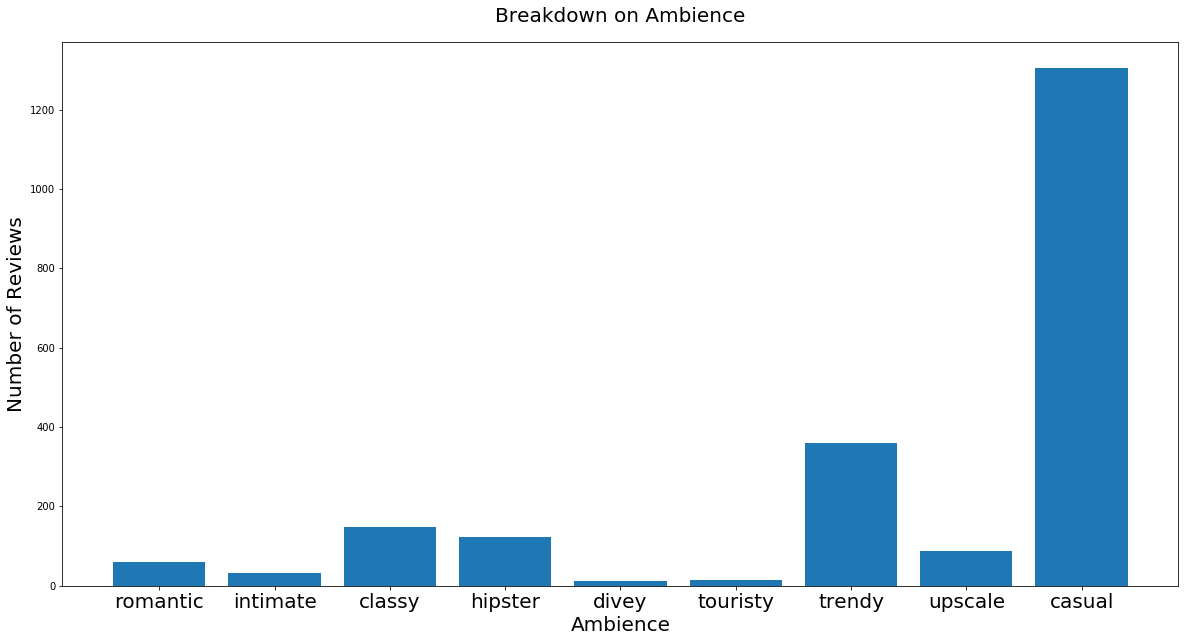

In [638]:
fig, ax = plt.subplots(figsize=[20, 10])

ax.bar(ambience_df['Ambience'], ambience_df['Count'])

ax.set_title('Breakdown on Ambience', fontsize=20, pad=20)
ax.set_xlabel('Ambience', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)

ax.set_xticklabels(ambience_df['Ambience'], fontsize=20)

fig.savefig('images/reviews_ambience.png', bbox_inches = "tight")

In [517]:
top_few

,Category Name,Count
36,Nightlife,456
32,Bars,442
5,American (New),386
3,Breakfast & Brunch,352
2,American (Traditional),308
49,Seafood,197
4,Sandwiches,195
48,Italian,183
12,Japanese,174
50,Pizza,172


In [95]:
italian_df = cat_reviews[cat_reviews['categories'].str.contains('Italian')]
italian_df

,name,business_id,city,state,categories,attributes
358,Pomo Pizzeria - Phoenix,pjpUOlJLlkIxBZ5BquA2PA,Phoenix,AZ,"Restaurants, Pizza, Sandwiches, Italian","{'OutdoorSeating': 'True', 'RestaurantsAttire'..."
364,Zest - Bistro & Bar,PIXl4WvAqjl2w9Lj81zXvQ,Las Vegas,NV,"Restaurants, Lounges, American (New), Italian,...","{'GoodForMeal': '{'dessert': False, 'latenight..."
351,La Grande Orange Pizzeria,7cK9uEV09iPmsTqOqmY3kQ,Phoenix,AZ,"Food, Restaurants, Salad, Italian, Pizza, Sand...","{'Alcohol': 'u'full_bar'', 'Ambience': '{'roma..."
337,Spinato's Pizzeria,RztX0zV7ObHZD08SDUhI0Q,Phoenix,AZ,"Pizza, Gluten-Free, Italian, Restaurants","{'RestaurantsDelivery': 'True', 'RestaurantsAt..."
384,Biaggio's Pizzeria,N6MzDoao6s68nAIW8vS9dQ,Las Vegas,NV,"Pasta Shops, Pizza, Specialty Food, Italian, F...","{'OutdoorSeating': 'False', 'RestaurantsTakeOu..."
...,...,...,...,...,...,...
946,Mercurio's,kwMJ4KfhEcrk9jiMe-S6wQ,Pittsburgh,PA,"Ice Cream & Frozen Yogurt, Food, Restaurants, ...","{'GoodForKids': 'True', 'RestaurantsAttire': '..."
964,Gaetano's Ristorante,ZtJ6sTq7-5rL9ORUtQJHAQ,Henderson,NV,"Restaurants, Italian, Beer, Wine & Spirits, Food","{'OutdoorSeating': 'False', 'RestaurantsReserv..."
932,Mercato Della Pescheria,WX8cx6tfFcEn0cK4cIbWag,Las Vegas,NV,"Italian, Modern European, Restaurants, Seafood...","{'GoodForMeal': '{'dessert': True, 'latenight'..."
912,Golden Steer Steakhouse,hRQS8y-uG2kc8miWVYiLuQ,Las Vegas,NV,"Restaurants, Italian, Seafood, Steakhouses, Salad","{'RestaurantsGoodForGroups': 'True', 'Business..."


In [530]:
italian_states = []

for st in italian_df.state.unique():
     italian_states.append(st)
        
italian_states

['AZ', 'NV', 'PA', 'OH', 'QC', 'NC', 'ON', 'WI']

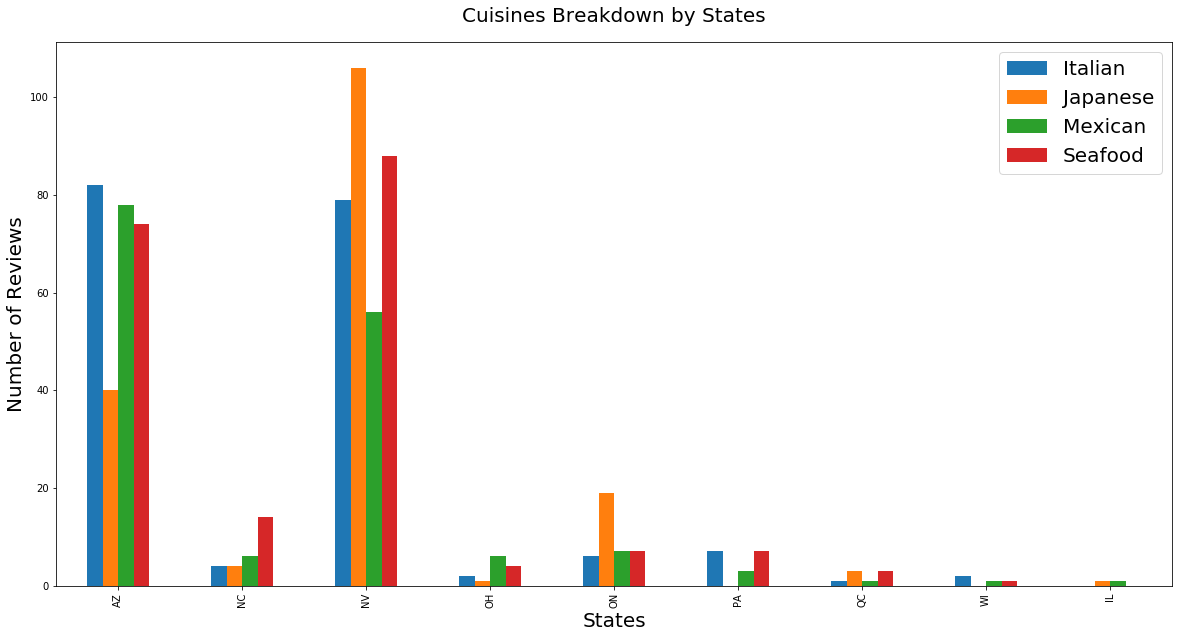

In [96]:
cuisines = ['Italian', 'Japanese', 'Mexican', 'Seafood']

cuisine_df = {}
cus = {}
cds = {}
ind = []
st_co = {}

# fig, ax = plt.subplots(figsize=[20, 10])

for idx, cuisine in enumerate(cuisines):
    cuisine_df[idx] = cat_reviews[cat_reviews['categories'].str.contains(cuisine)]

    cus[idx] = cuisine_df[idx].groupby('state').count()['business_id']
    cds[idx] = pd.DataFrame(list(cus[idx].items()), columns=['State', 'Count'])
    for s in cds[idx]['State']:
        if (s not in ind):
            ind.append(s)
    li = []
    for jdx, st in enumerate(ind):
        try:
            li.append(cus[idx][st])
        except KeyError as e:
            li.append(0)
    
    st_co[idx] = li

st_co[0].append(0)
italian = st_co[0]
japanese = st_co[1]
mexican = st_co[2]
seafood = st_co[3]

df = pd.DataFrame({'Italian': italian,
                   'Japanese': japanese,
                   'Mexican': mexican,
                   'Seafood': seafood
                  }, index=ind)
ax = df.plot.bar(figsize=[20, 10])
ax.set_title('Cuisines Breakdown by States', fontsize=20, pad=20)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)
plt.legend(fontsize=20)
# plt.show()
plt.savefig('images/cuisines_states.png', bbox_inches = "tight")

In [125]:
cat_business_stars = pd.merge(restaurant_df, review_stars, left_on='business_id', right_on='business_id').rename(columns={'name_x': 'name', 'city_x': 'city', 'state_x':'state', 'stars_x': 'stars', 'review_count_y': 'review_count'}).drop(columns=['name_y', 'city_y', 'state_y', 'stars_y', 'review_count_x', 'latitude', 'longitude', 'is_open'])
cat_business_stars

,_id,business_id,name,address,city,state,postal_code,stars,attributes,categories,hours,review_count
0,5e0667da639ab4c5194ba029,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",17152
1,5e0667da639ab4c5194ba02a,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,4.0,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",30260
2,5e0667da639ab4c5194ba033,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,3.0,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",342
3,5e0667da639ab4c5194ba035,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,4.0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",288
4,5e0667da639ab4c5194ba039,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,4.0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,1640
...,...,...,...,...,...,...,...,...,...,...,...,...
59366,5e0668a3639ab4c5194e9073,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,4.0,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ...",12995
59367,5e0668a3639ab4c5194e9075,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,4.0,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",484
59368,5e0668a3639ab4c5194e907b,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,4.5,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",16
59369,5e0668a3639ab4c5194e907c,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,4.0,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",675


In [136]:
lv_df = cat_business_stars[(cat_business_stars['city'] == 'Las Vegas') & (cat_business_stars['state'] == 'NV')]
hen_df = cat_business_stars[(cat_business_stars['city'] == 'Henderson') & (cat_business_stars['state'] == 'NV')]
hen_df

,_id,business_id,name,address,city,state,postal_code,stars,attributes,categories,hours,review_count
43,5e0667db639ab4c5194ba0c4,jScBTQtdAt-8RshaiBEHgw,Served,"1770 W Horizon Ridge, Ste 100",Henderson,NV,89012,4.5,"{'DriveThru': 'False', 'RestaurantsAttire': ''...","Ethnic Food, American (New), Burgers, Food, Re...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-15:0', '...",454176
106,5e0667db639ab4c5194ba17f,jX9DocoiY4Bo9EUkaTSqvg,China AAA,10624 S Eastern Ave,Henderson,NV,89052,4.5,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Restaurants, Hawaiian, Chinese, Japanese, Poke...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ...",22201
111,5e0667db639ab4c5194ba18b,iA9xu-6oOFynZQxO5qrauQ,DOC Holliday's Saloon,2551 Anthem Village Dr,Henderson,NV,89052,3.0,None,"Nightlife, Restaurants, Bars",None,9
141,5e0667db639ab4c5194ba1db,UPh90LM8UMnVFQP6NGktrA,Cakes On the Move,1211 Santa Helena Ave,Henderson,NV,89002,5.0,"{'RestaurantsDelivery': 'True', 'BusinessParki...","Restaurants, Bakeries, Food","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",3249
231,5e0667db639ab4c5194ba2ea,1nF8Me63cpxIkFK8Ysx-DA,Shabu Shabu Paradise,"1716 W Horizon Ridge Pkwy, Ste 110",Henderson,NV,89012,4.5,"{'WiFi': 'u'no'', 'RestaurantsAttire': ''casua...","Fondue, Japanese, Restaurants","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",63984
...,...,...,...,...,...,...,...,...,...,...,...,...
58778,5e0668a1639ab4c5194e88d0,SkSkWld_ijmWVEDo9_ztKw,Bistro Pizza,"55 S Gibson Rd, Ste 112",Henderson,NV,89012,4.5,"{'RestaurantsAttire': 'u'casual'', 'BikeParkin...","Sandwiches, Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Wednesday': '11:0-21:0'...",265895
59045,5e0668a2639ab4c5194e8c71,bysPjs8xmBLc6yu8CZwJDg,"RARE Fine Steak, Wine & Lounge","11261 S Eastern Ave, Ste 200",Henderson,NV,89052,3.0,"{'GoodForKids': 'False', 'RestaurantsAttire': ...","Steakhouses, Restaurants",None,56
59083,5e0668a2639ab4c5194e8cf5,jc4Wlgme6xI0-c1U_AKuBQ,NAGA - Thai Dining,"76 W Horizon Ridge Pkwy, Ste 150",Henderson,NV,89012,4.0,"{'NoiseLevel': 'u'quiet'', 'Caters': 'False', ...","Thai, Restaurants","{'Tuesday': '16:30-21:0', 'Wednesday': '16:30-...",160605
59177,5e0668a3639ab4c5194e8e10,dPbzlRWQzBlVdhkkDigfOw,Jack In the Box,10505 S Eastern Ave,Henderson,NV,89052,2.5,"{'RestaurantsGoodForGroups': 'True', 'GoodForM...","Fast Food, Restaurants",None,728


In [137]:
lv_stars = lv_df.groupby('stars').count()['business_id']
hd_stars = hen_df.groupby('stars').count()['business_id']

<BarContainer object of 8 artists>

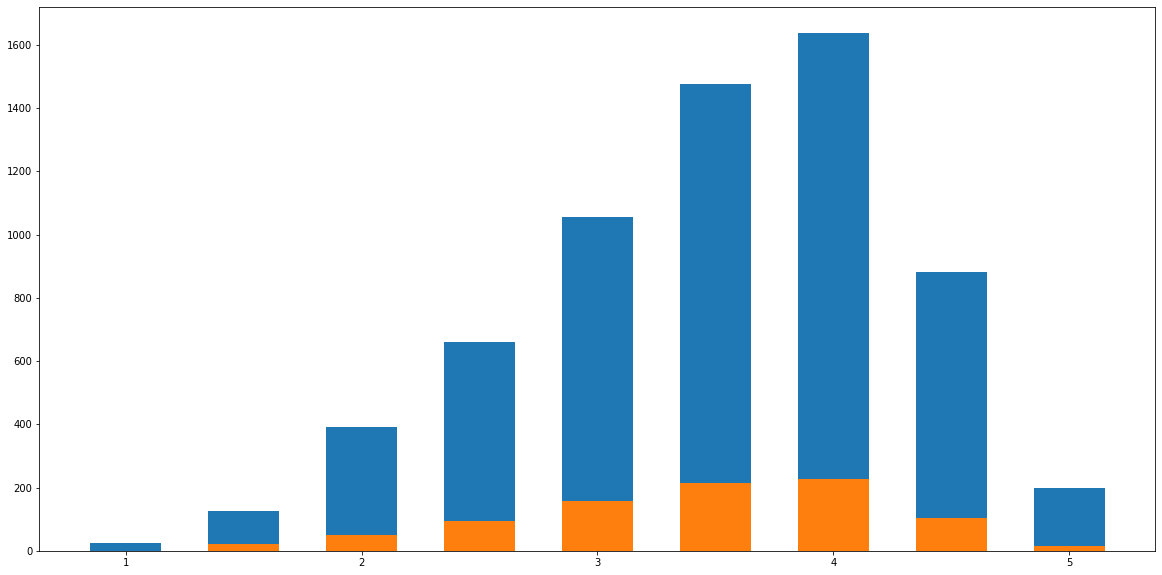

In [139]:
lv_stars_df = pd.DataFrame(list(lv_stars.items()), columns=['Stars', 'Count'])
hen_stars_df = pd.DataFrame(list(hd_stars.items()), columns=['Stars', 'Count'])

fig, ax = plt.subplots(figsize=[20, 10])
ax.bar(lv_stars_df['Stars'], lv_stars_df['Count'], width=0.3)
ax.bar(hen_stars_df['Stars'], hen_stars_df['Count'], width=0.3)

In [176]:
stars = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
lvc = {}
city_df = {}
c_df = {}

state_re = {}

lv_cities = ['Las Vegas', 'Henderson']

for idx, city in enumerate(lv_cities):
    lvc[idx] = cat_business_stars[(cat_business_stars['city'] == city) & (cat_business_stars['state'] == 'NV')]
    c_df[idx] = lvc[idx].groupby('stars').count()['business_id']
    city_df[idx] = pd.DataFrame(list(c_df[idx].items()), columns=['Stars', 'Count'])
    li = []
    
    for jdx, star in enumerate(stars):
        if city_df[idx]['Stars'][jdx] == star:
            li.append(city_df[idx]['Count'][jdx])
        else:
            li.append(0)
    state_re[idx] = li

print(city_df[1])
print(state_re[0])

# lv_stars_df["Stars"]
# cuisine_df = {}
# cus = {}
# cds = {}
# ind = []
# st_co = {}

# # fig, ax = plt.subplots(figsize=[20, 10])

# for idx, cuisine in enumerate(cuisines):
#     cuisine_df[idx] = cat_reviews[cat_reviews['categories'].str.contains(cuisine)]

#     cus[idx] = cuisine_df[idx].groupby('state').count()['business_id']
#     cds[idx] = pd.DataFrame(list(cus[idx].items()), columns=['State', 'Count'])
#     for s in cds[idx]['State']:
#         if (s not in ind):
#             ind.append(s)
#     li = []
#     for jdx, st in enumerate(ind):
#         try:
#             li.append(cus[idx][st])
#         except KeyError as e:
#             li.append(0)
    
#     st_co[idx] = li

   Stars  Count
0    1.5     22
1    2.0     51
2    2.5     93
3    3.0    159
4    3.5    213
5    4.0    227
6    4.5    105
7    5.0     15
[24, 126, 392, 659, 1054, 1477, 1637, 880, 200]
